In [1]:
import os
import random
import librosa
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

In [2]:
# https://towardsdatascience.com/data-augmentation-techniques-for-audio-data-in-python-15505483c63c
def spec_augment(original_melspec,
                 freq_masking_max_percentage = 0.08, 
                 time_masking_max_percentage = 0.15):

    augmented_melspec = original_melspec.copy()
    all_frames_num, all_freqs_num = augmented_melspec.shape

    # Frequency masking
    freq_percentage = random.uniform(0.0, freq_masking_max_percentage)
    num_freqs_to_mask = int(freq_percentage * all_freqs_num)
    f0 = int(np.random.uniform(low = 0.0, high = (all_freqs_num - num_freqs_to_mask)))
    
    augmented_melspec[:, f0:(f0 + num_freqs_to_mask)] = 0

    # Time masking
    time_percentage = random.uniform(0.0, time_masking_max_percentage)
    num_frames_to_mask = int(time_percentage * all_frames_num)
    t0 = int(np.random.uniform(low = 0.0, high = (all_frames_num - num_frames_to_mask)))
    
    augmented_melspec[t0:(t0 + num_frames_to_mask), :] = 0
    
    return augmented_melspec

In [3]:
no_of_augmented_images_tobe_formed = 0
freq_masking_max_percentage = 0.08
time_masking_max_percentage = 0.15


def CQT_spectrogram(audio,saving_location):
  # Load audio file
  y, sr = librosa.load(audio)

  # Compute CQT spectrogram
  C = np.abs(librosa.cqt(y, sr=sr))

  # Plot CQT spectrogram
  plt.figure(figsize=(8, 6))
  librosa.display.specshow(librosa.amplitude_to_db(C, ref=np.max),sr=sr) #, x_axis='time', y_axis='cqt_note'
  plt.savefig(saving_location,bbox_inches='tight')
  # # plt.colorbar(format='%+2.0f dB')
  # # plt.tight_layout()
  # plt.show()
  # return C
  for i in range(no_of_augmented_images_tobe_formed):
    aug_qct = spec_augment(C)
    aug_saving_location = saving_location+'--augmented--'+str(i)
    
    # Plot CQT spectrogram
    plt.figure(figsize=(8, 6))
    librosa.display.specshow(librosa.amplitude_to_db(aug_qct, ref=np.max),sr=sr) #, x_axis='time', y_axis='cqt_note'
    plt.savefig(aug_saving_location,bbox_inches='tight')

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
audio_folder_path = '/content/drive/MyDrive/Colab Notebooks/test2/new_dataset_2/'
saving_dir = '/content/drive/MyDrive/Colab Notebooks/test2/CQT_techno&semi/'

audio_folder_path, saving_dir

('/content/drive/MyDrive/Colab Notebooks/test2/new_dataset_2/',
 '/content/drive/MyDrive/Colab Notebooks/test2/CQT_techno&semi/')

Memo 036.m4a
Memo 040.m4a
Memo 041.m4a
Memo 029.m4a
Memo 030.m4a
Memo 033.m4a
Memo 032.m4a
Memo 031.m4a
Memo 039.m4a
Memo 028.m4a
Memo 037.m4a
Memo 038.m4a
Memo 042.m4a
Memo 034.m4a
Memo 035.m4a
Semi 7.m4a
Semi 9.m4a
Semi 10.m4a
Semi 3.m4a
Semi 8.m4a
Semi 1.m4a
Semi 6.m4a
Semi 4.m4a
Semi 2.m4a
Semi 5.m4a
Recording 1.m4a
Recording 2.m4a
Recording 3.m4a
Recording 4.m4a
Recording 5.m4a
Recording 6.m4a
Recording 7.m4a
Recording 8.m4a
Recording 9.m4a
Recording 10.m4a
Semi 1 (2).m4a
Semi 5 (2).m4a
Semi 4 (2).m4a
Semi 3 (2).m4a
Semi 6 (2).m4a
Semi 9 (2).m4a
Semi 2 (2).m4a
Semi 8 .m4a
Semi 7 (2).m4a
21 Apr, 7.19 pm​(2).aac
21 Apr, 7.19 pm​(3).aac
21 Apr, 7.17 pm​.aac
21 Apr, 7.19 pm​.aac
21 Apr, 7.18 pm​.aac
21 Apr, 7.21 pm​.aac
21 Apr, 7.20 pm​(2).aac
21 Apr, 7.20 pm​(3).aac
21 Apr, 7.20 pm​.aac
21 Apr, 7.21 pm​(2).aac
Semi 7 (3).m4a
Semi 10 (2).m4a
Semi 3 (3).m4a
Semi 2 (3).m4a
Semi 6 (3).m4a
Semi 8 (2).m4a
Semi 5 (3).m4a
Semi 4 (3).m4a
Semi 9 (3).m4a
Semi 1 (3).m4a
Memo 043.m4a
Memo 044.m4a

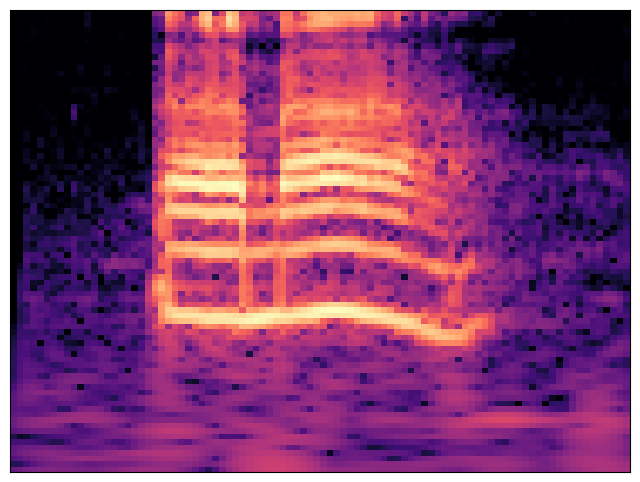

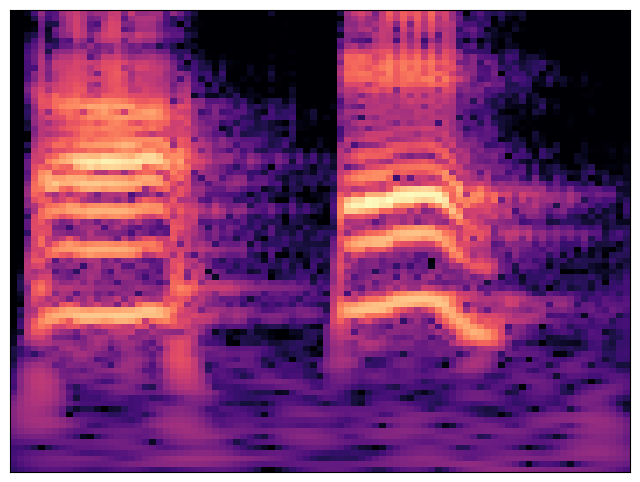

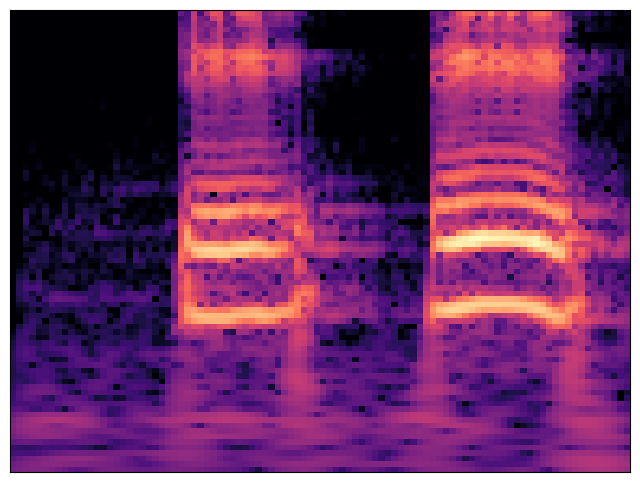

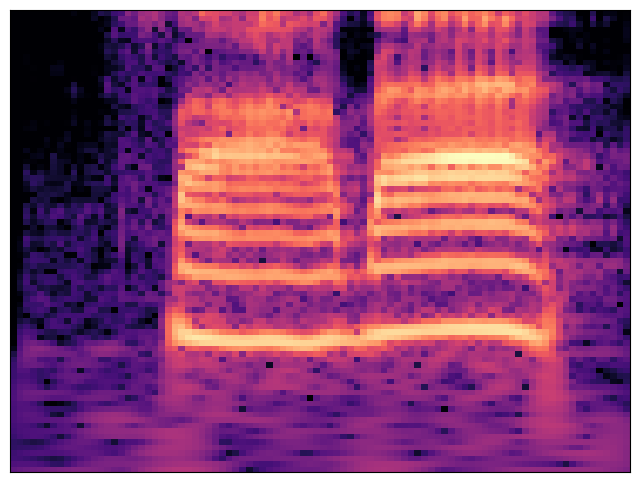

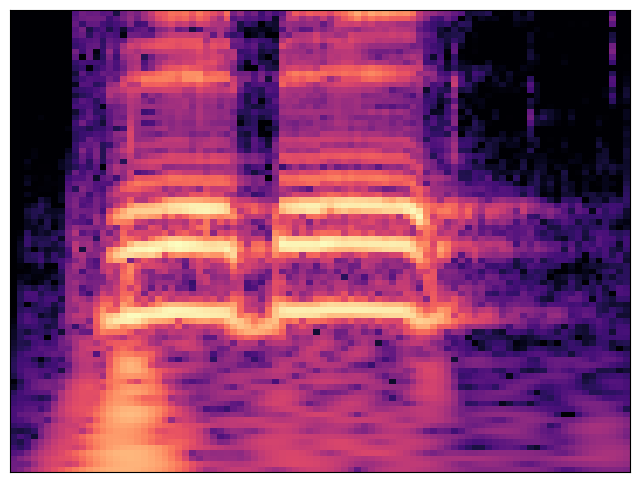

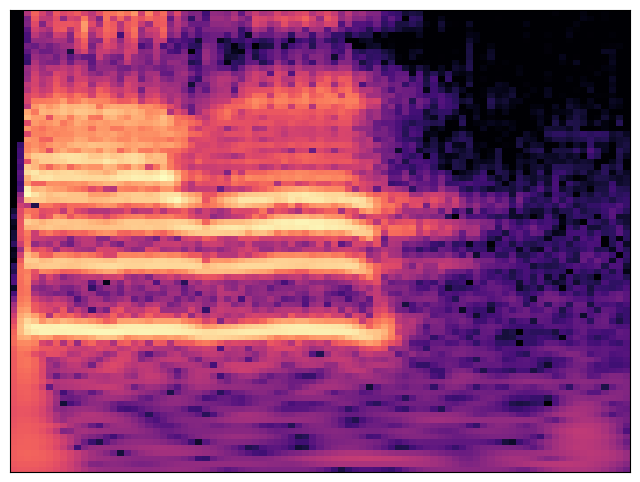

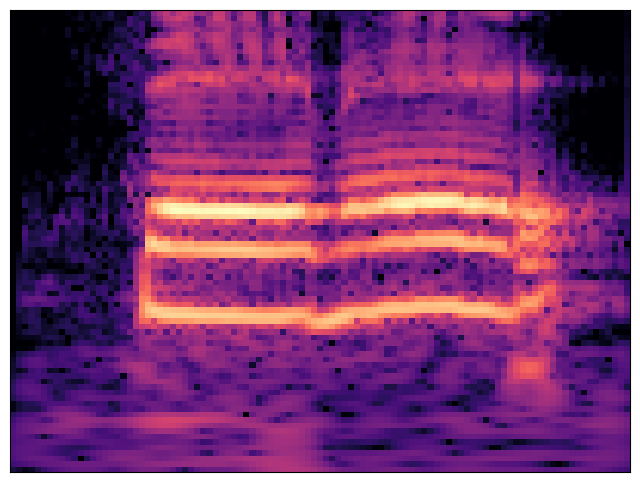

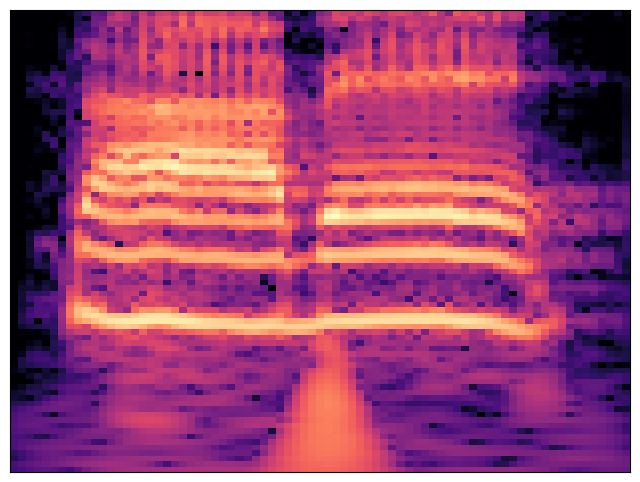

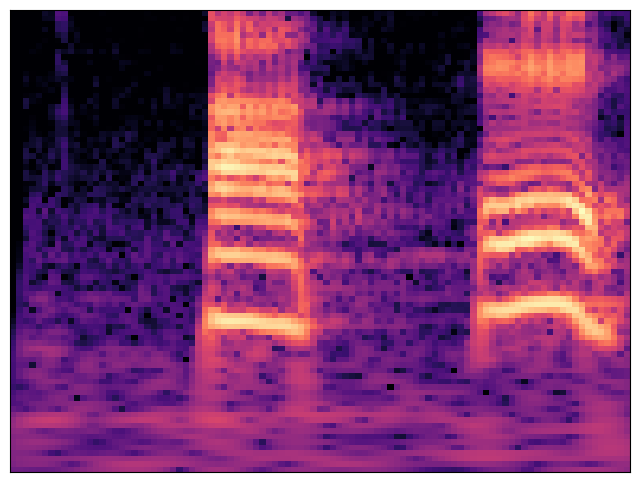

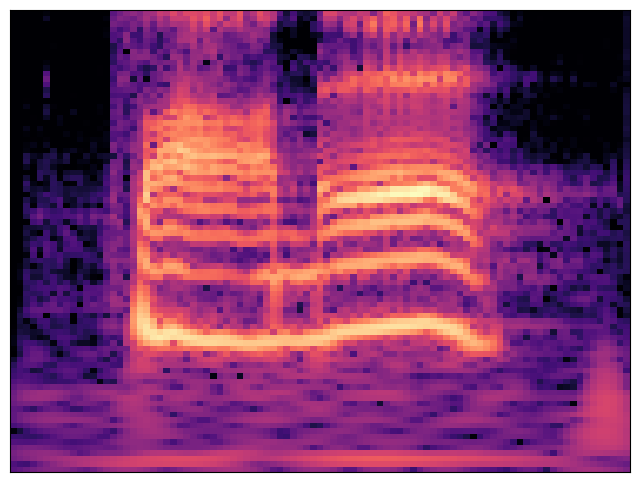

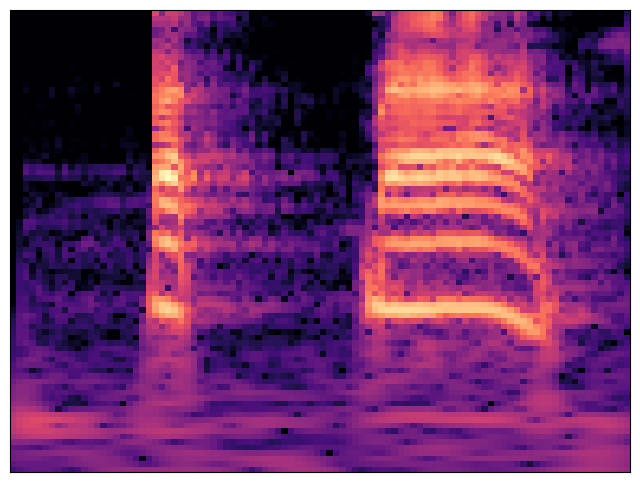

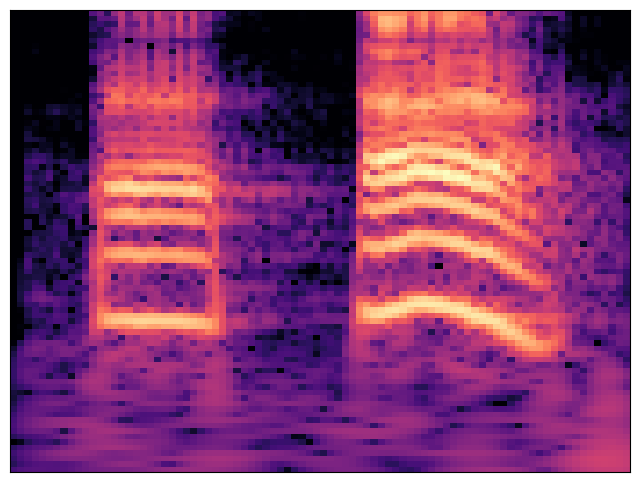

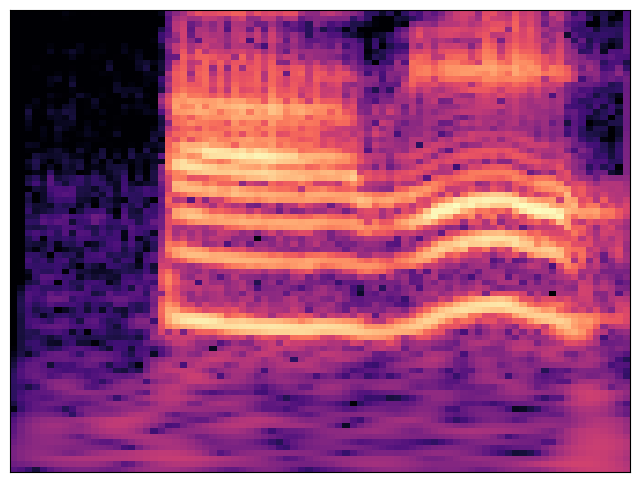

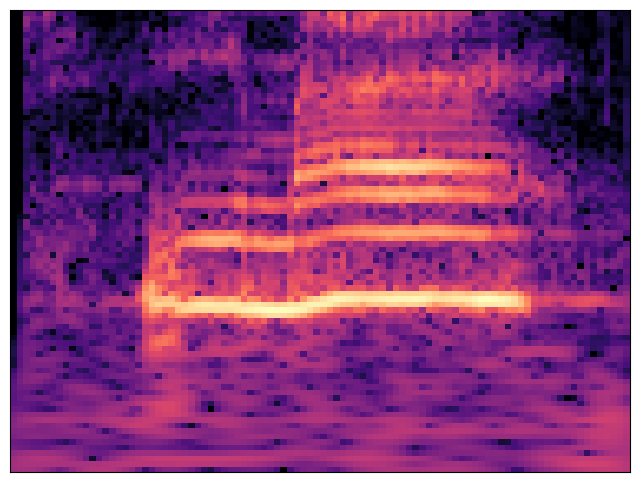

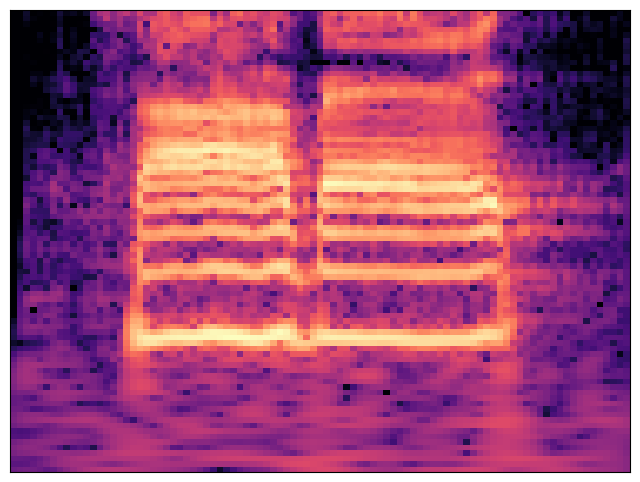

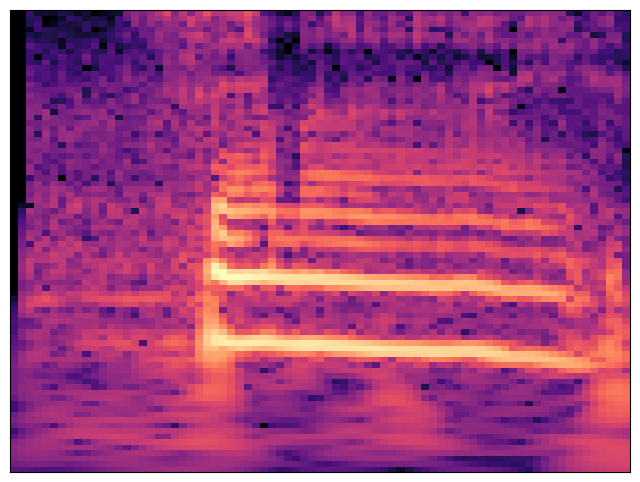

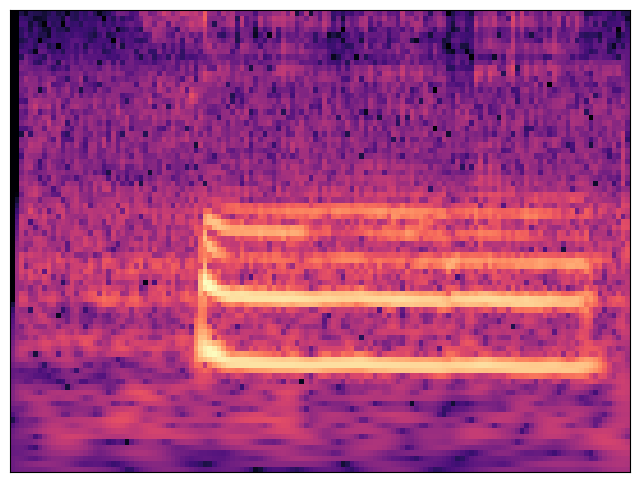

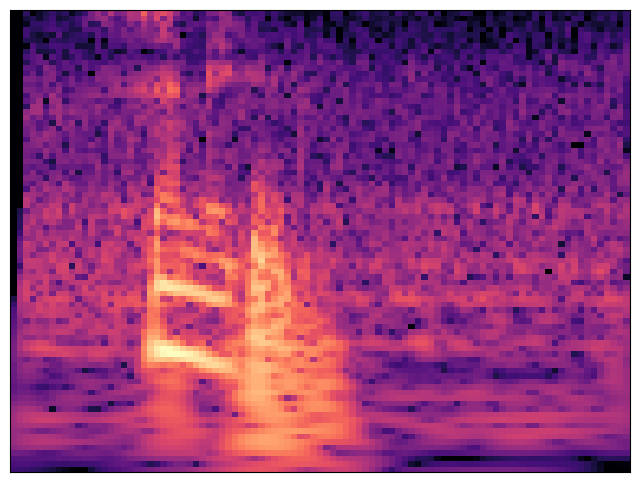

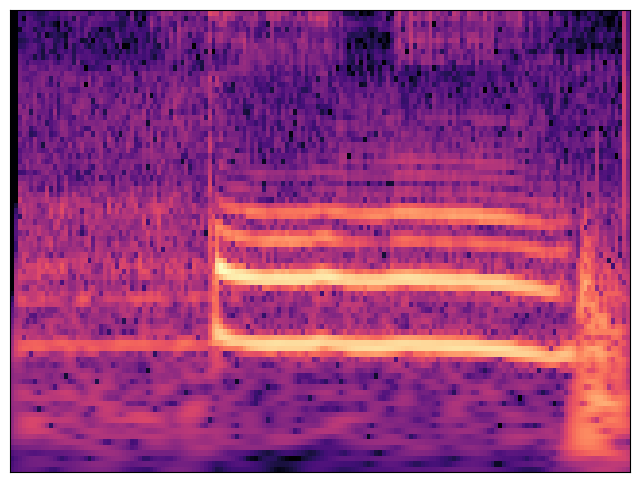

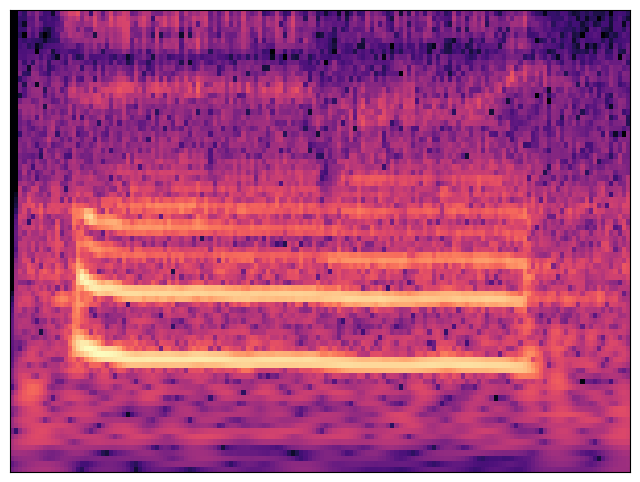

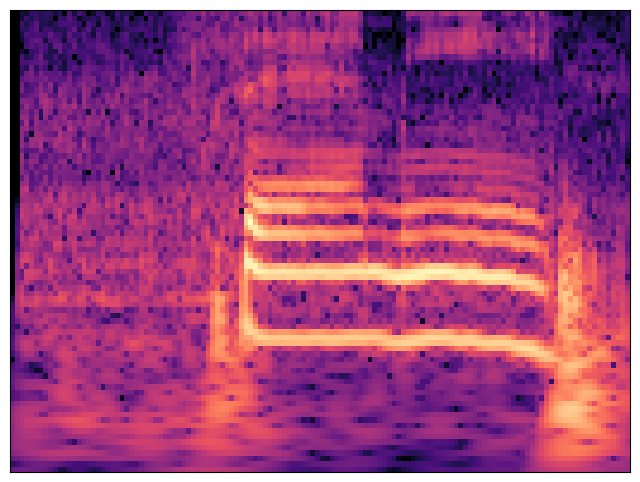

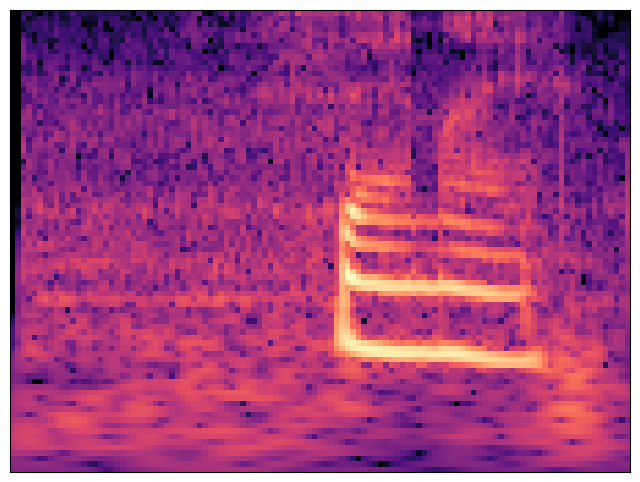

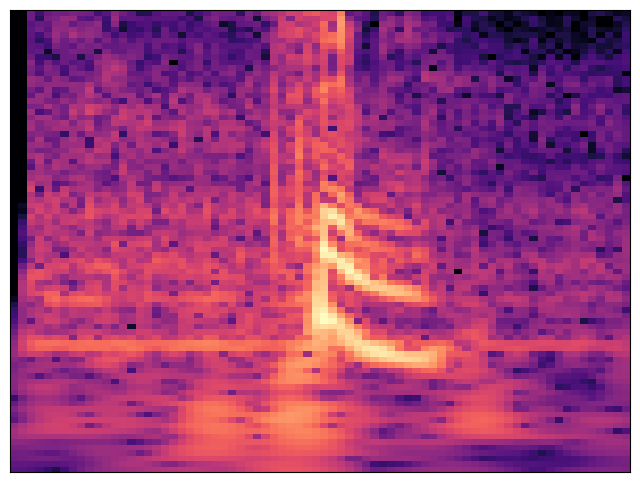

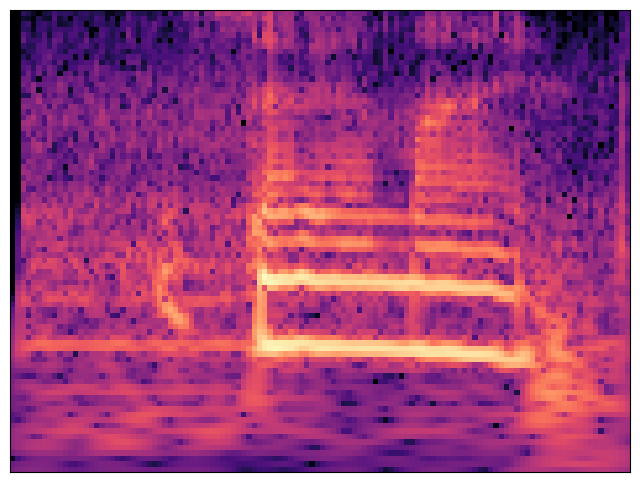

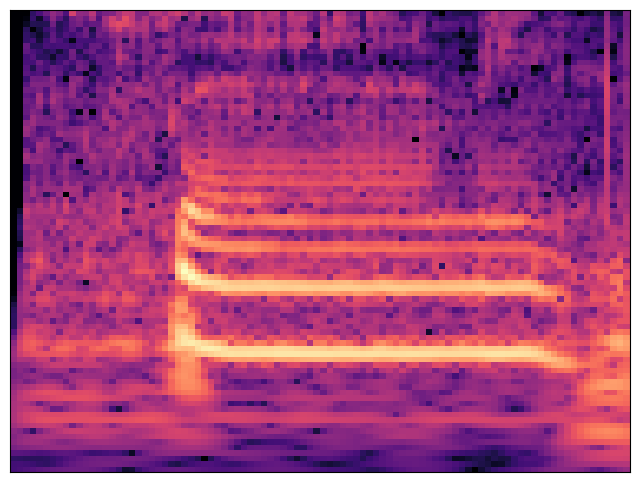

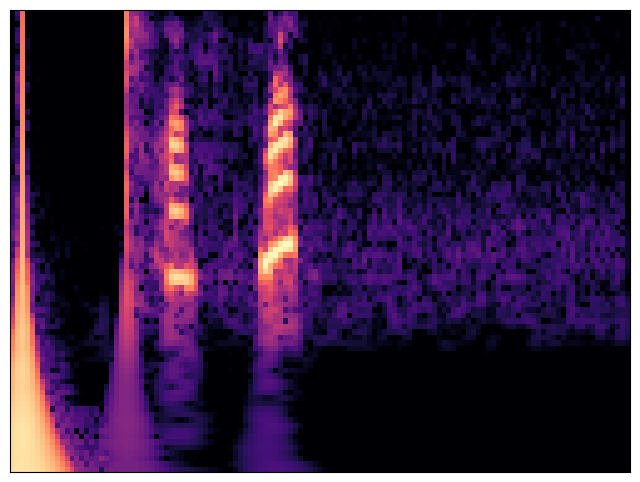

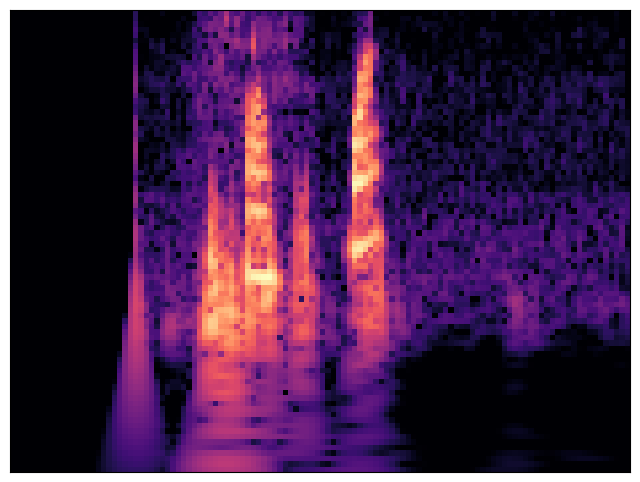

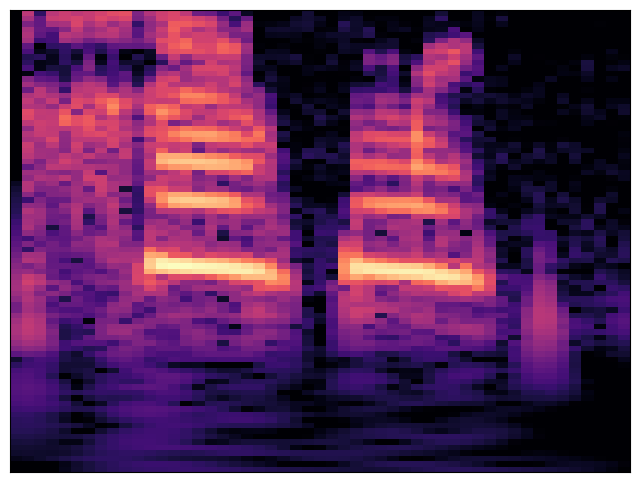

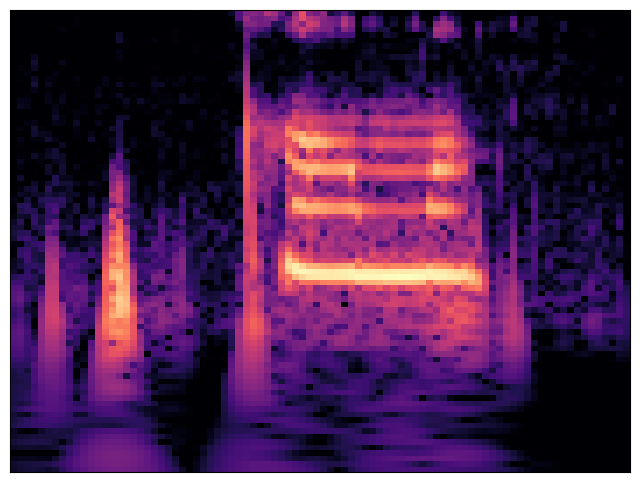

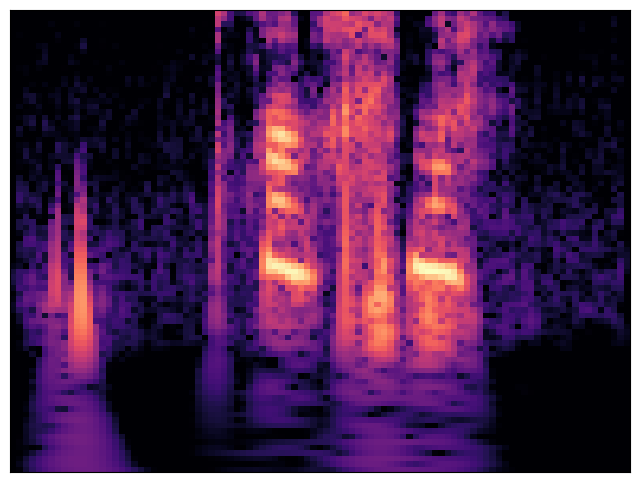

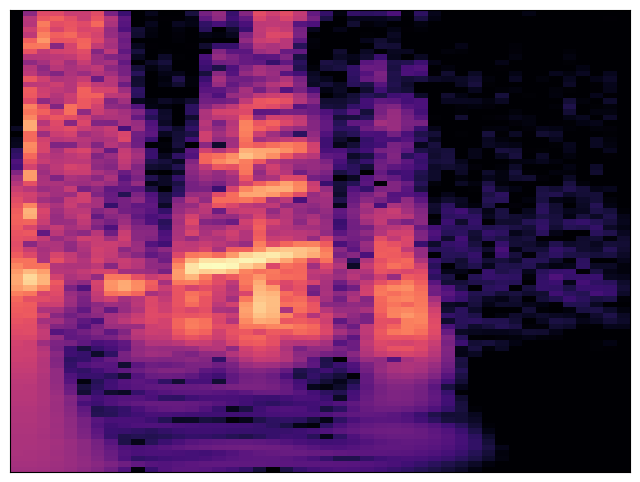

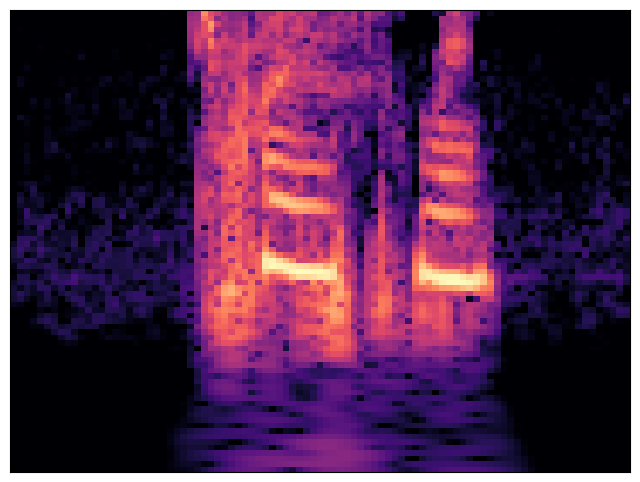

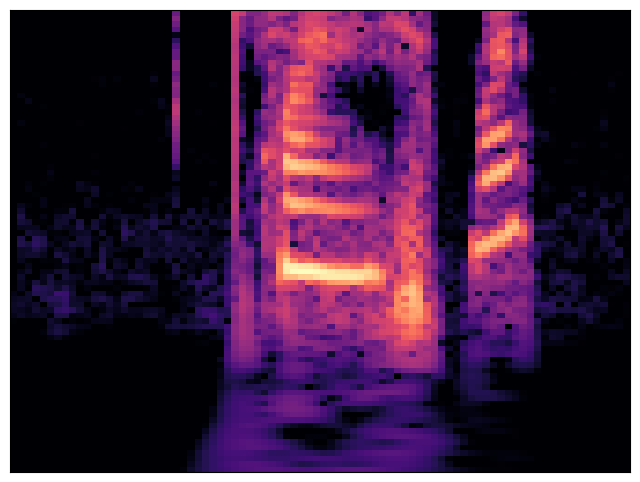

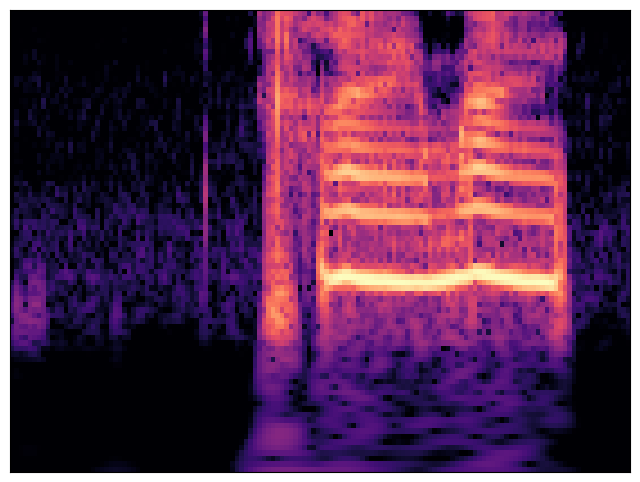

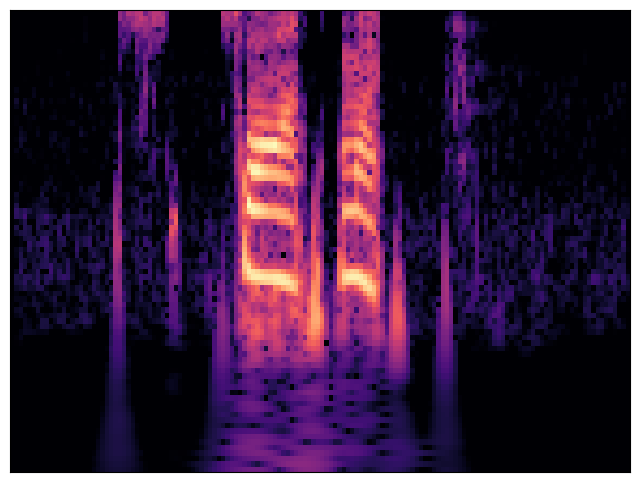

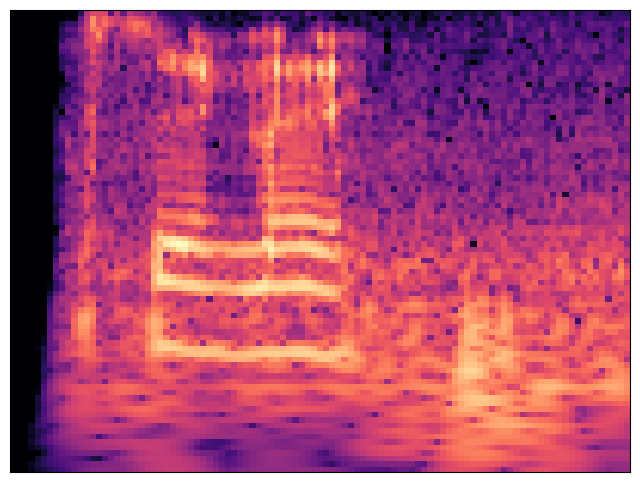

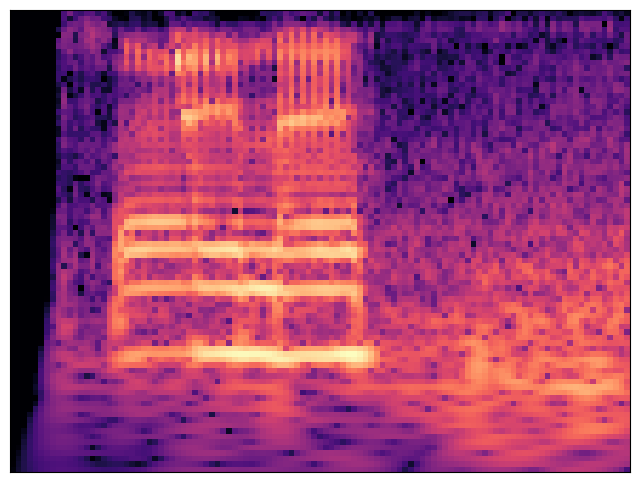

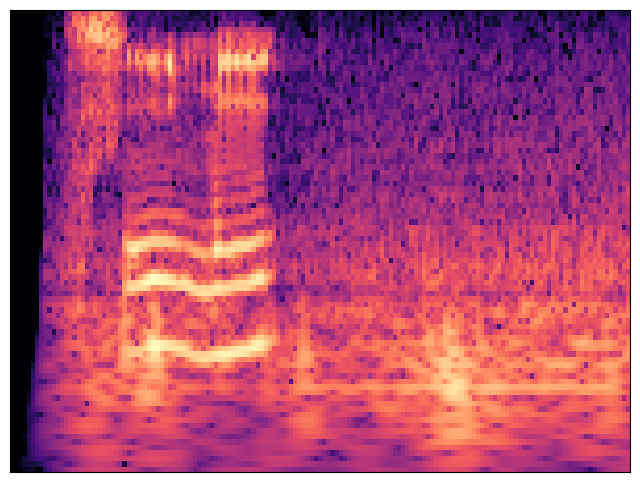

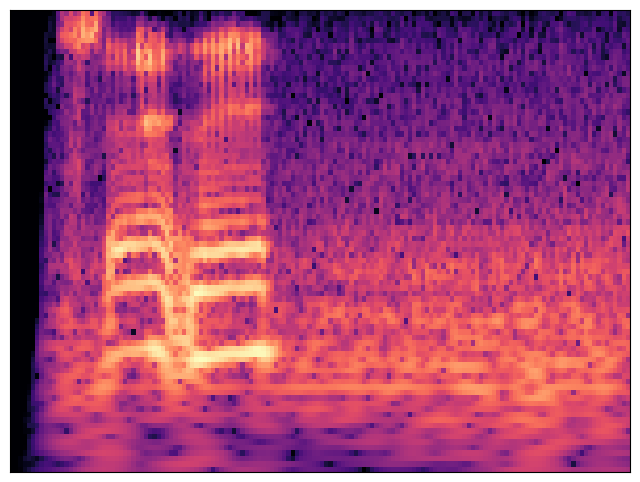

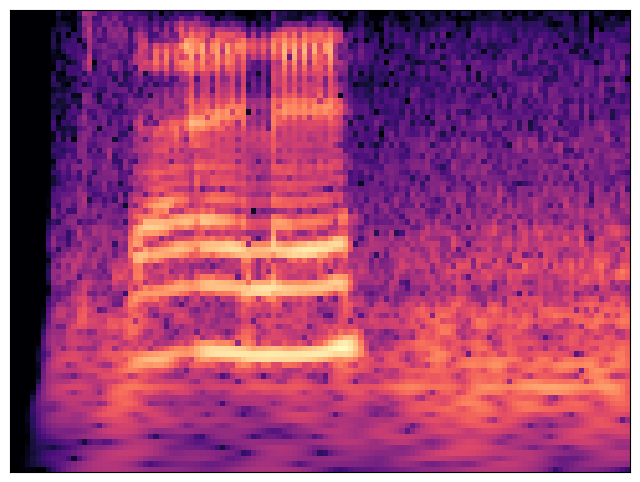

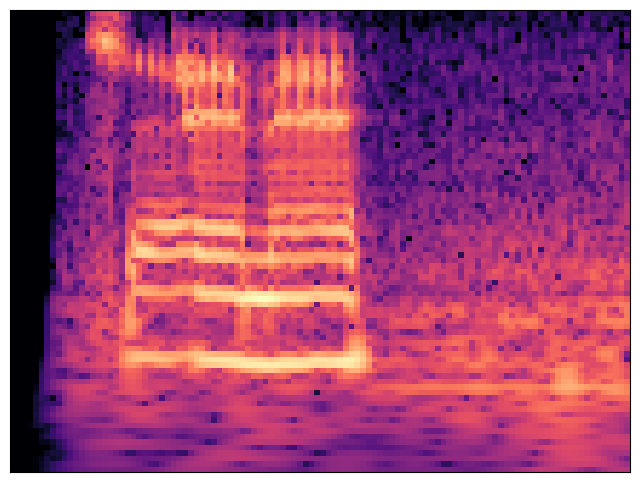

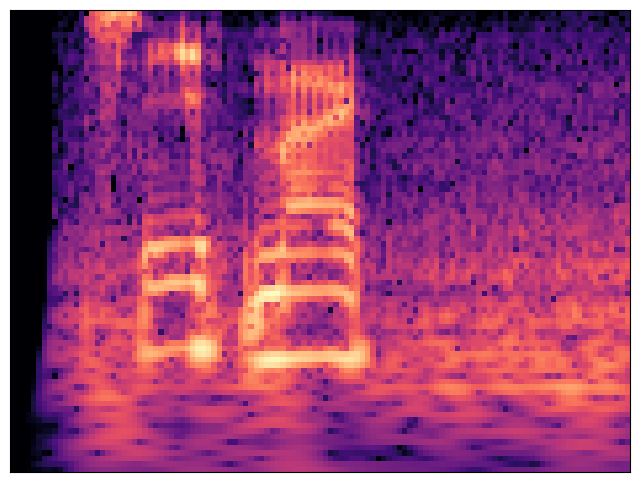

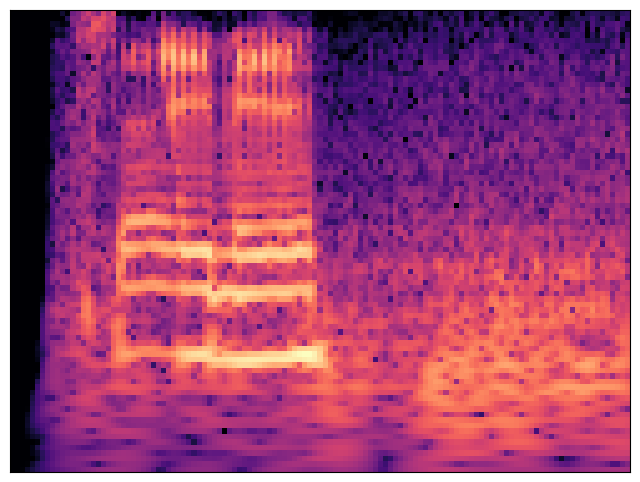

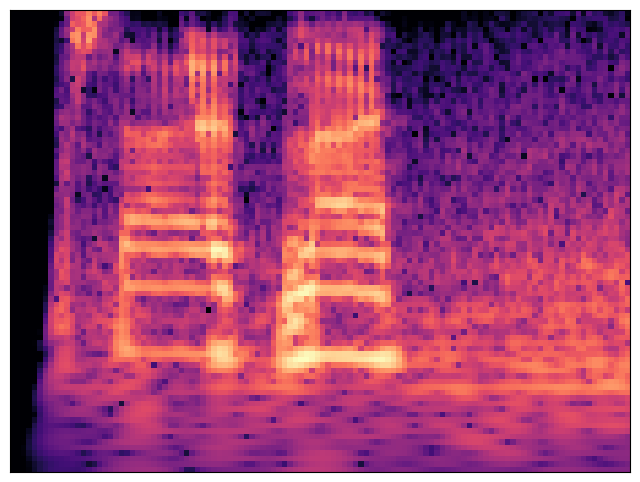

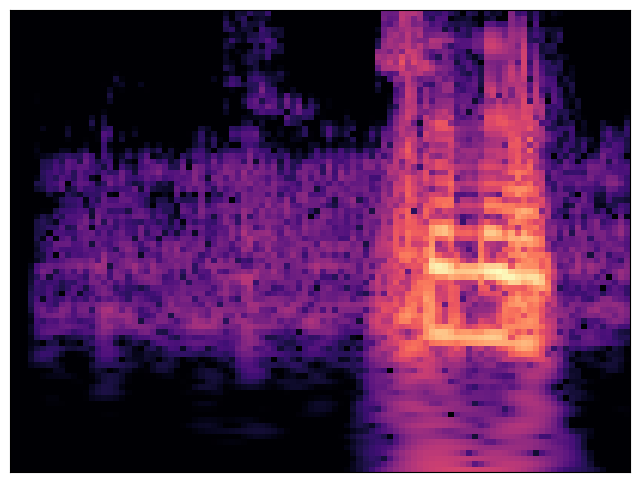

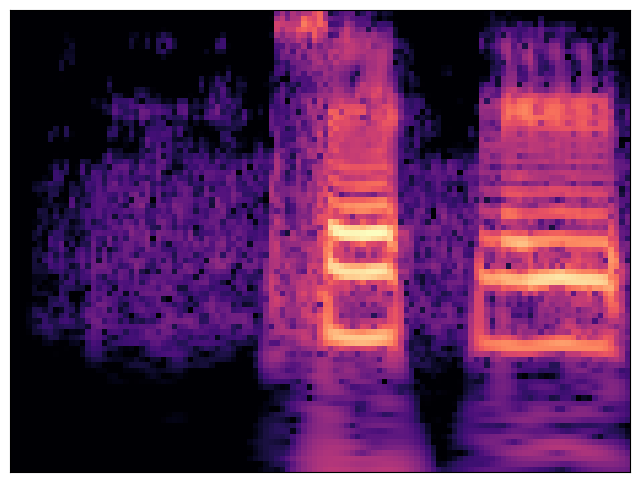

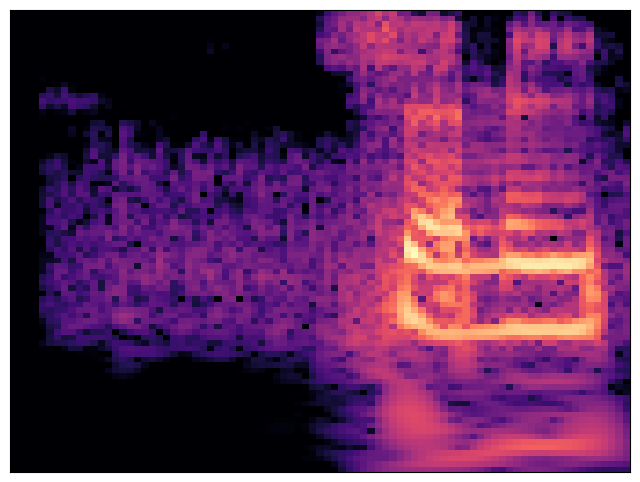

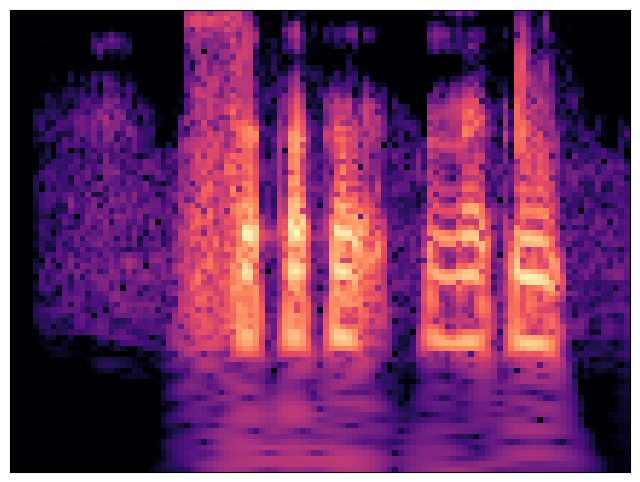

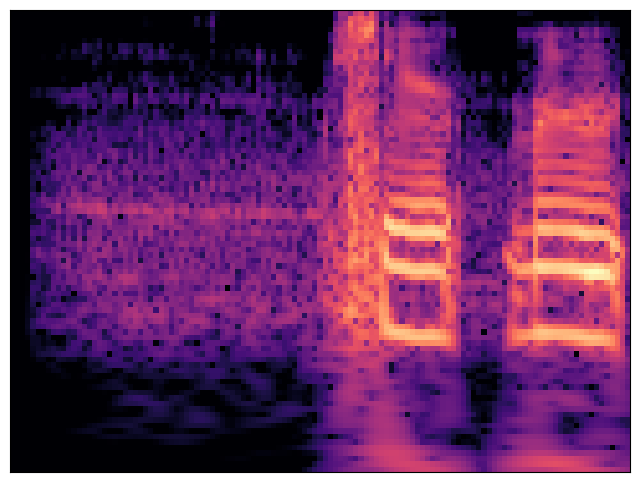

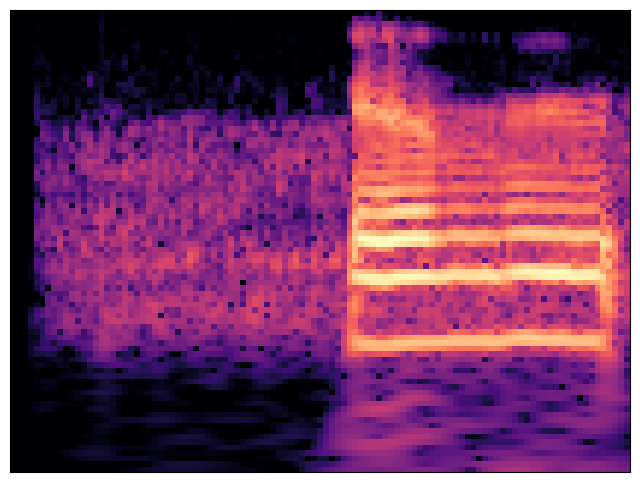

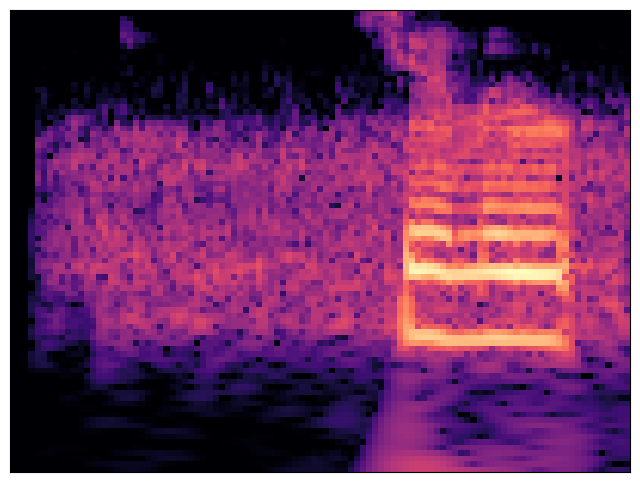

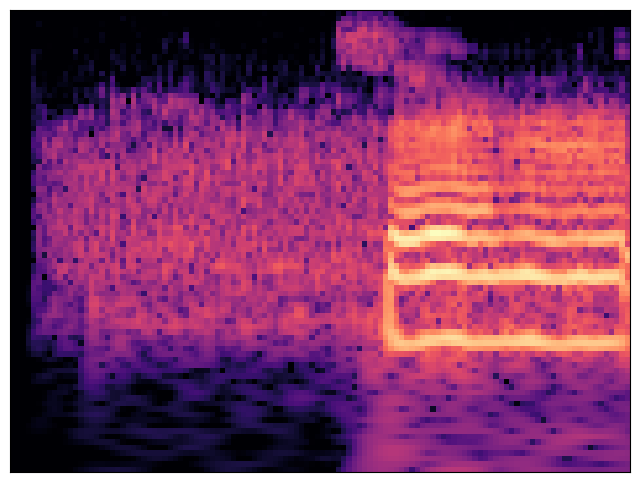

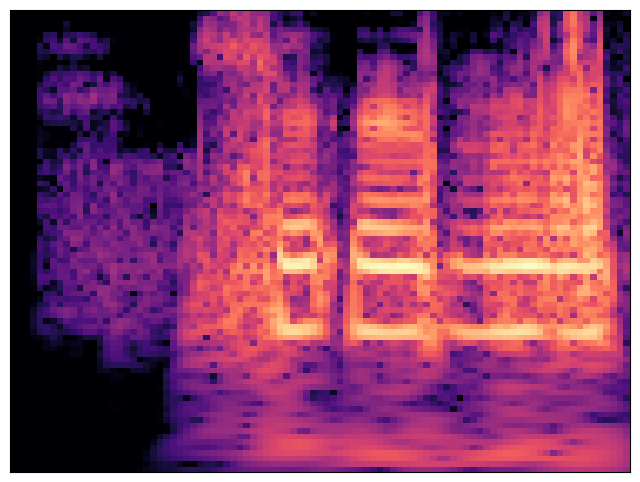

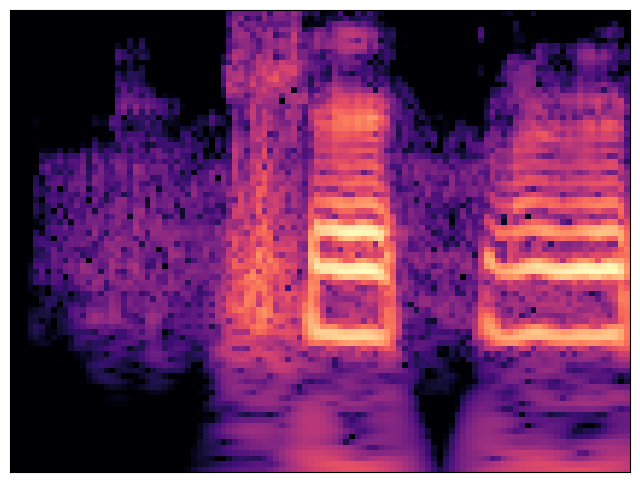

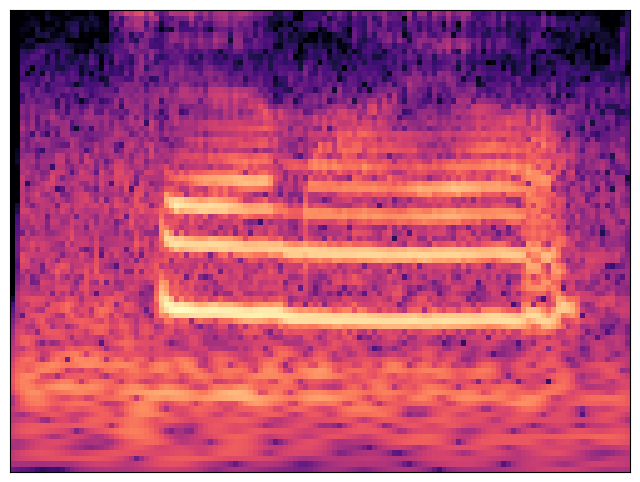

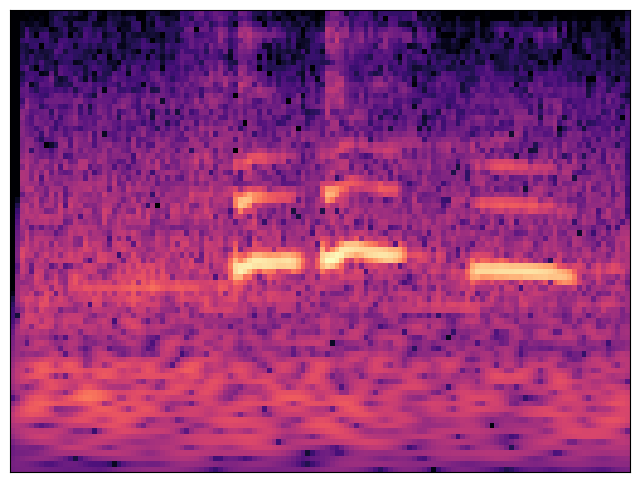

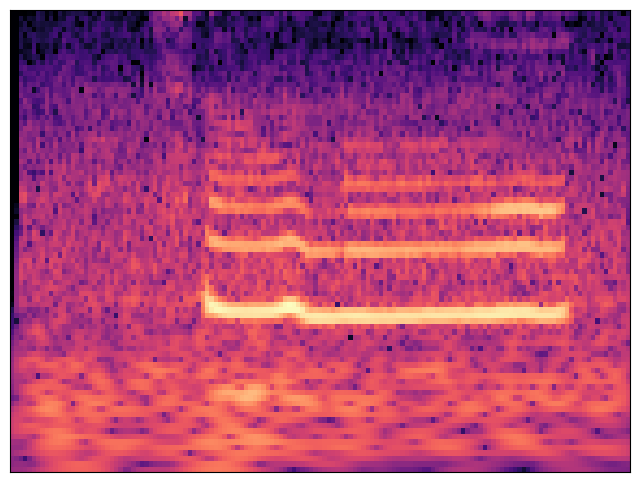

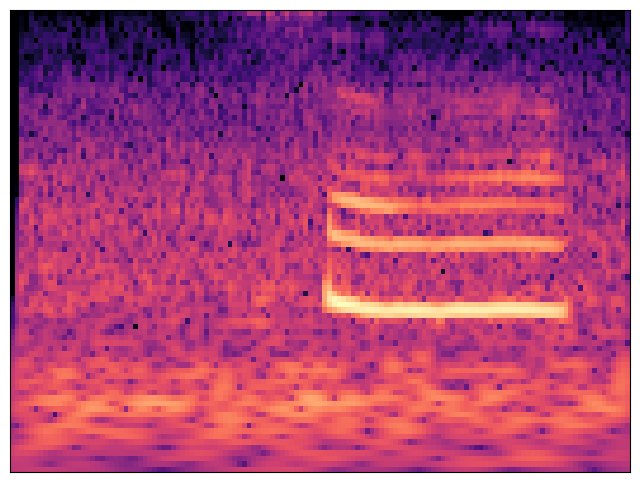

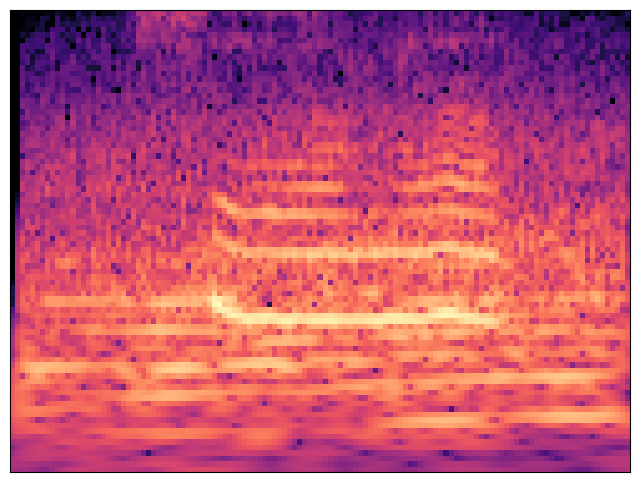

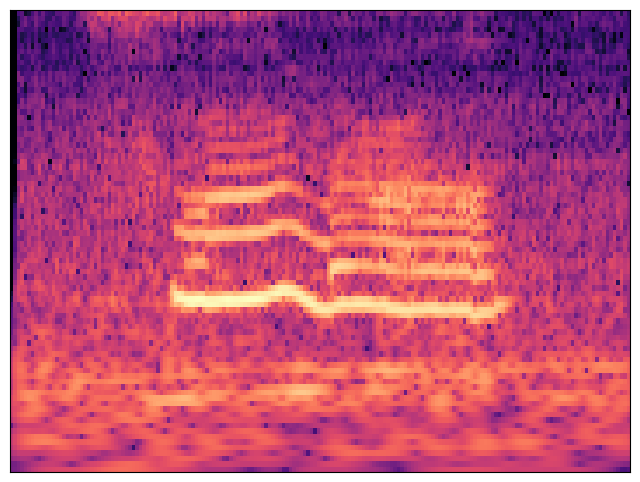

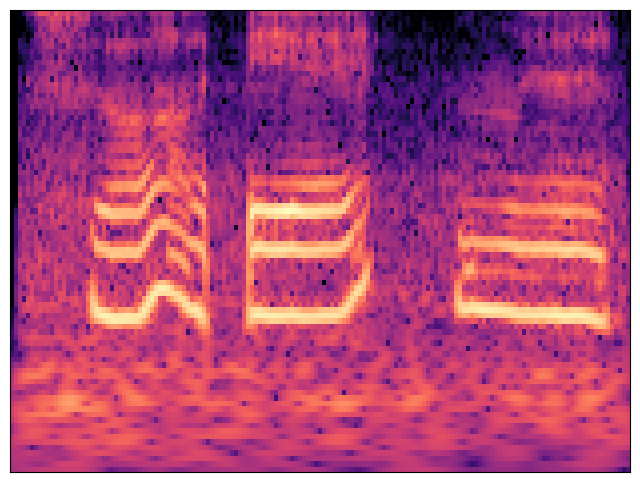

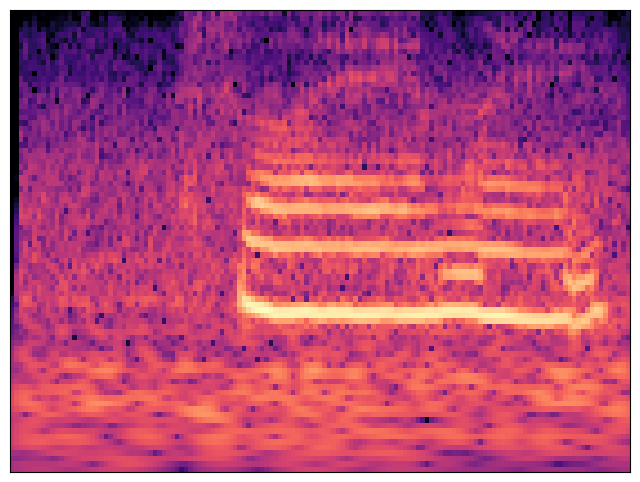

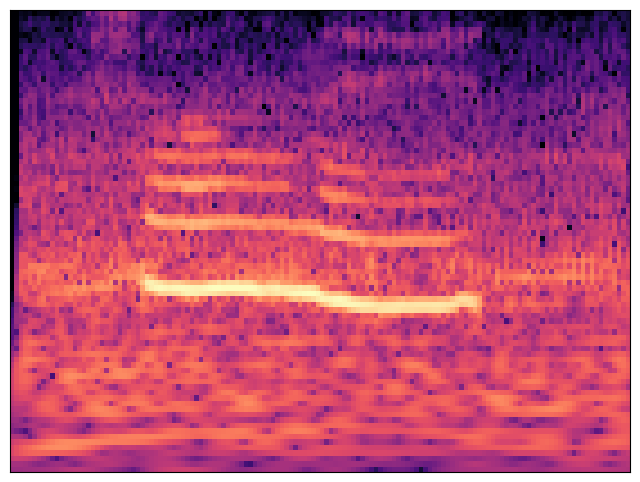

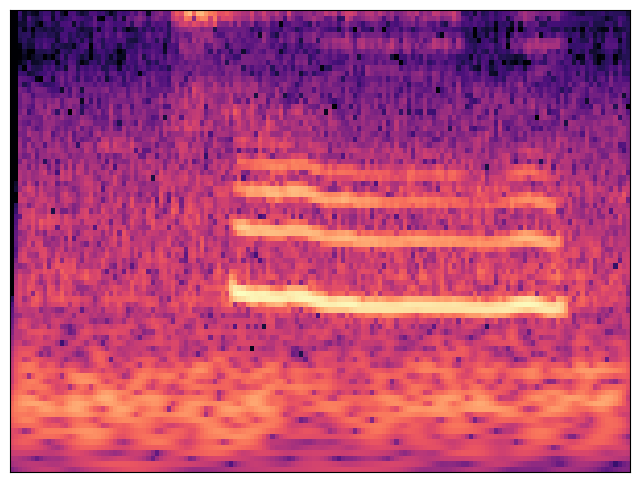

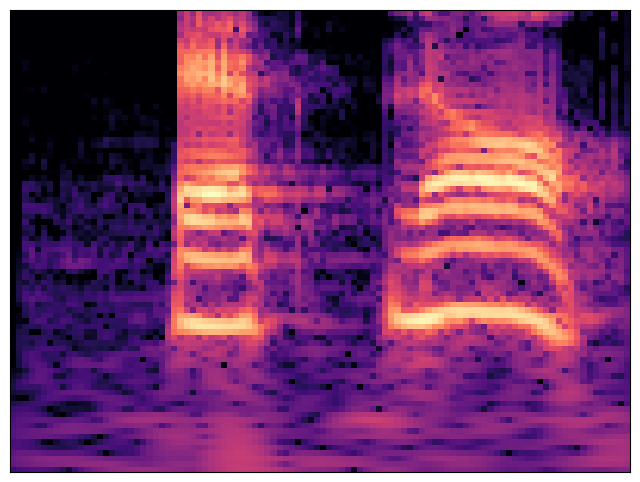

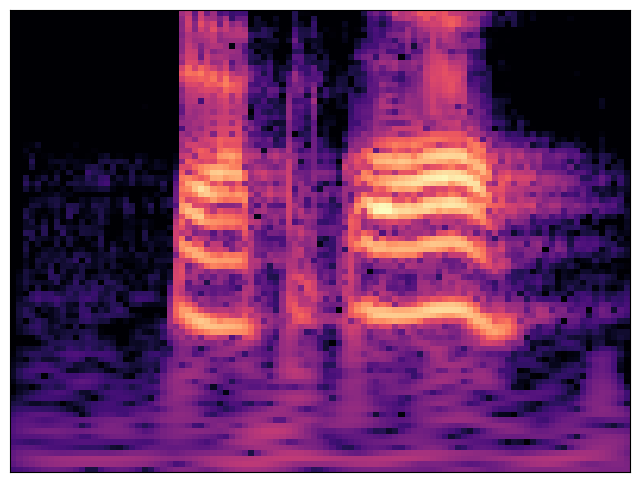

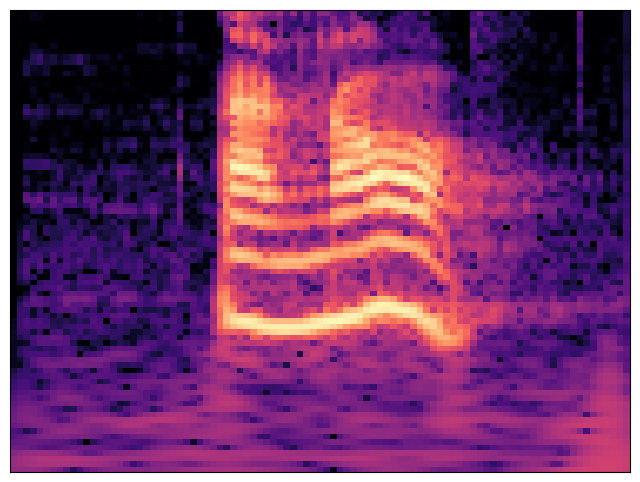

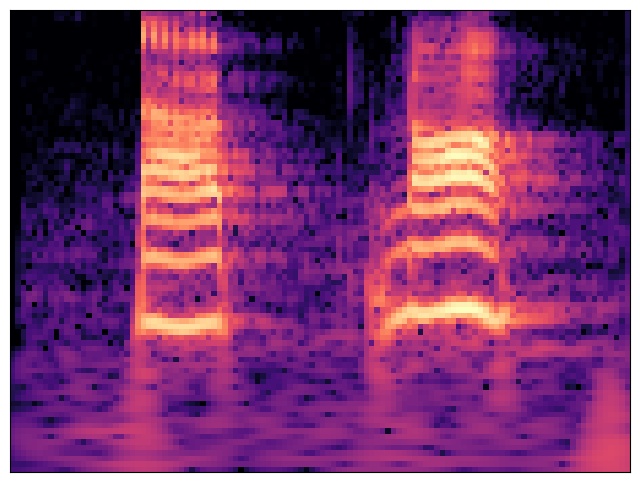

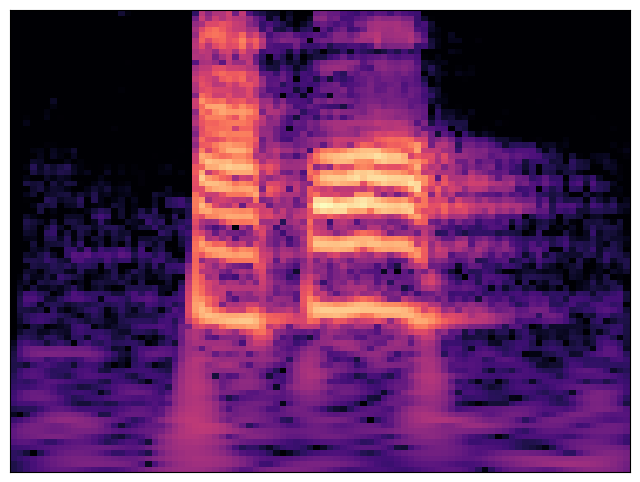

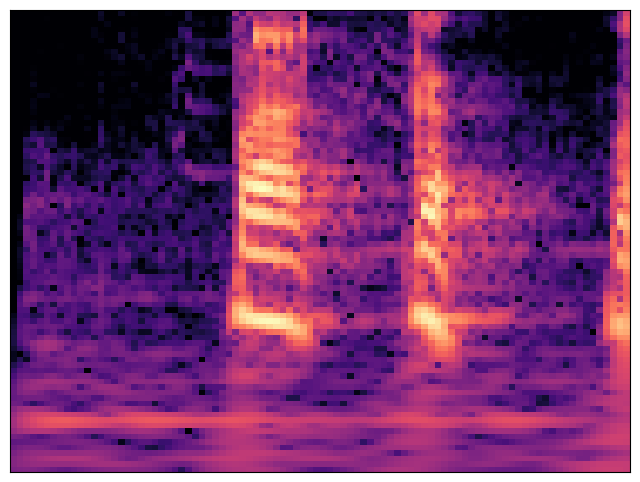

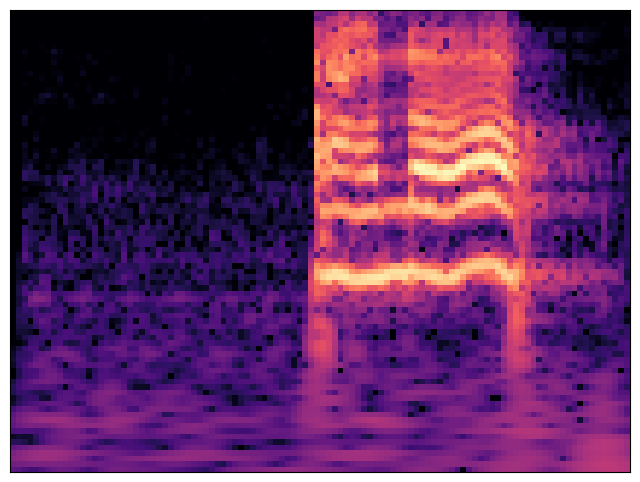

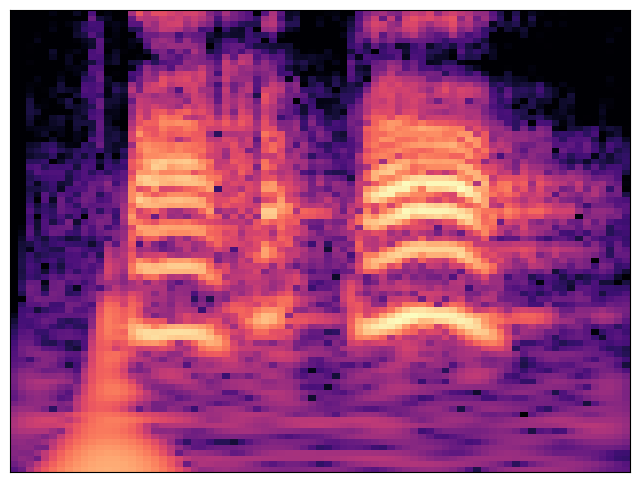

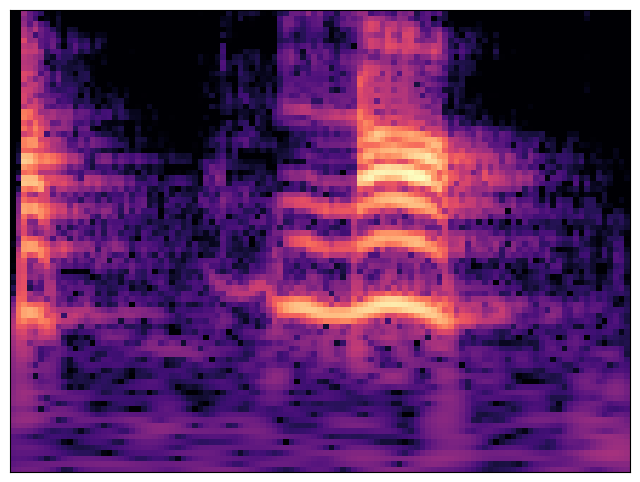

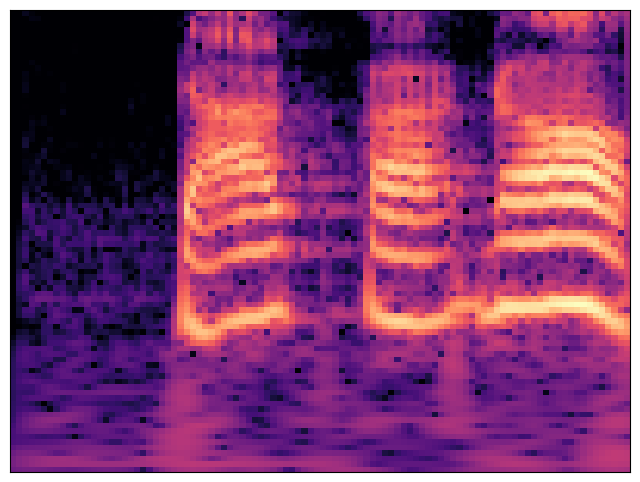

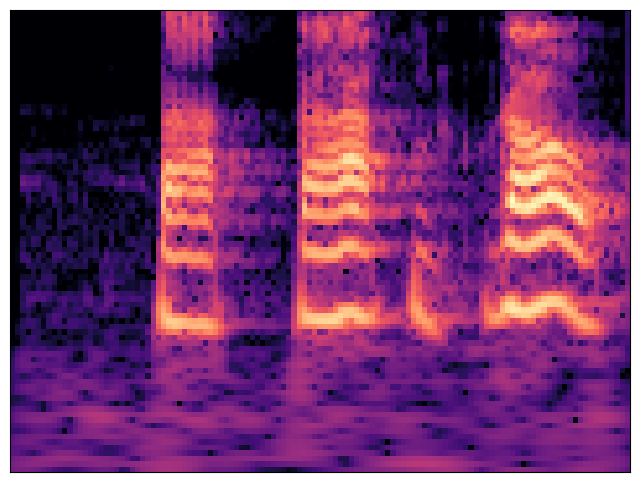

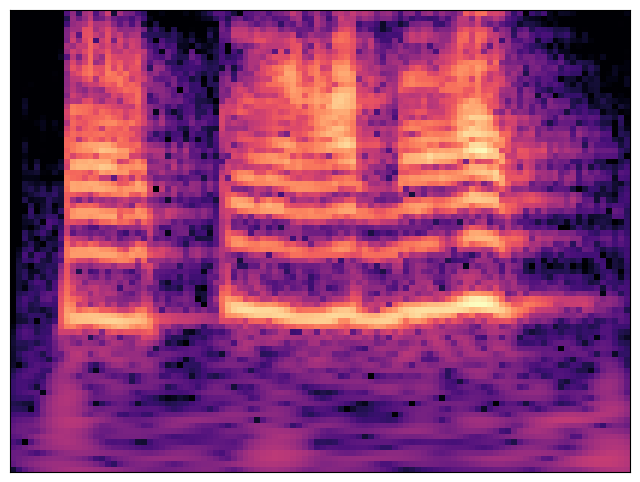

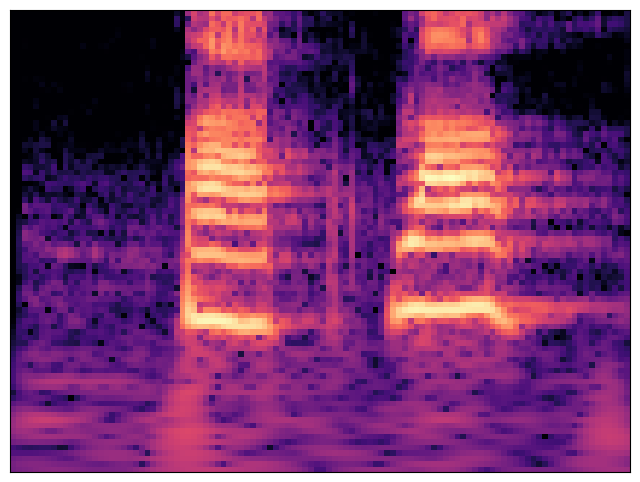

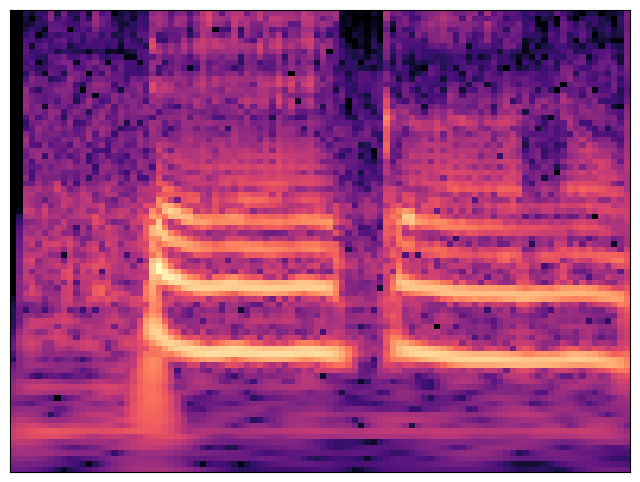

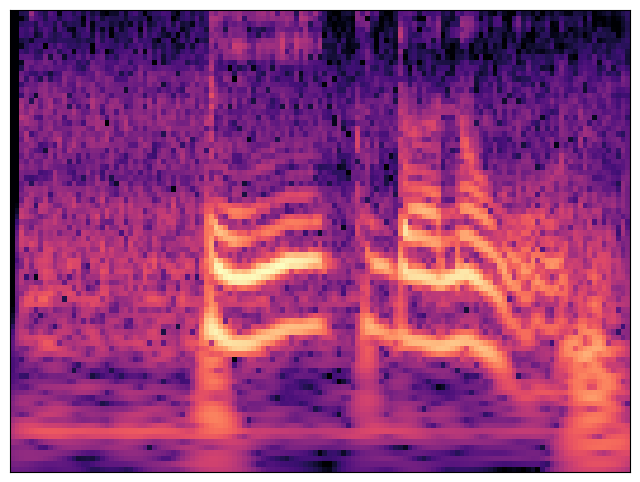

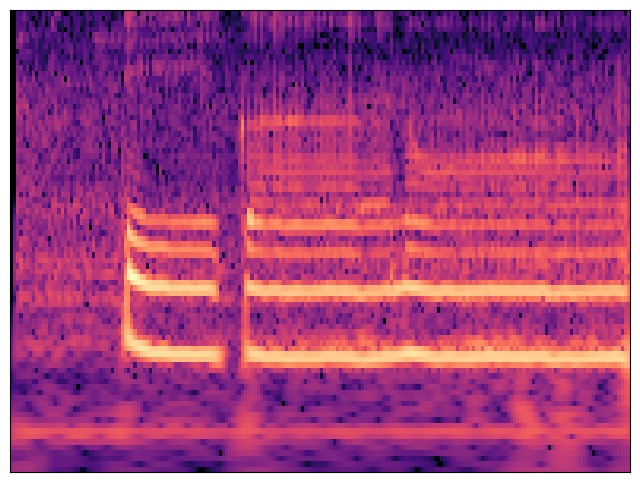

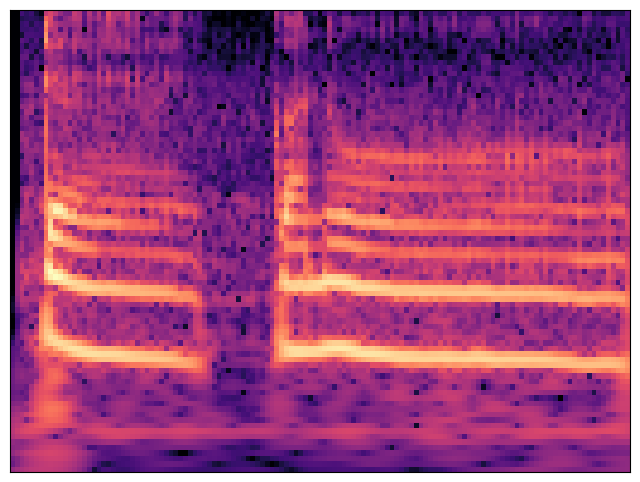

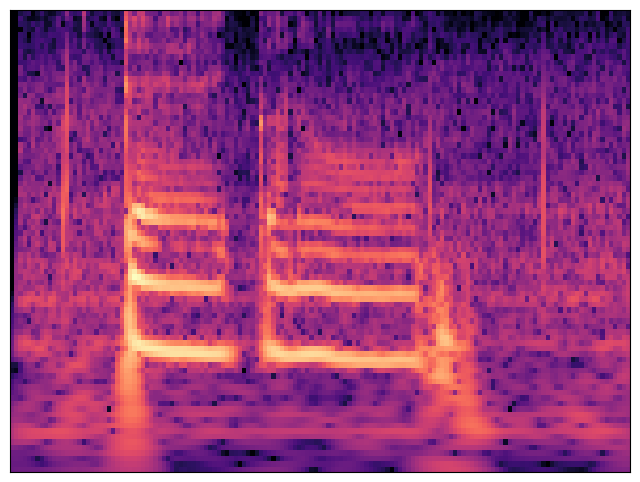

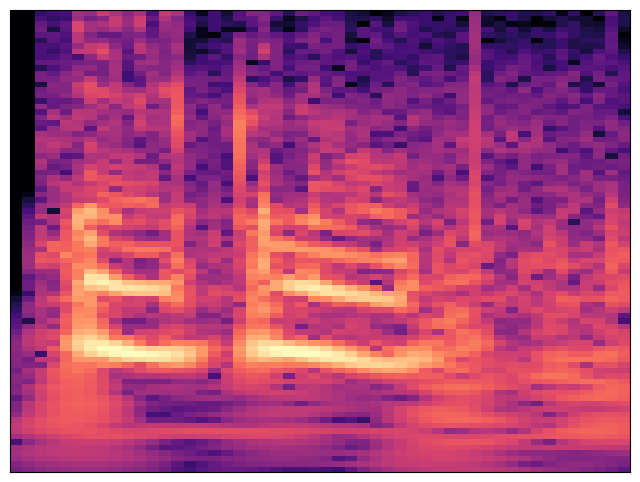

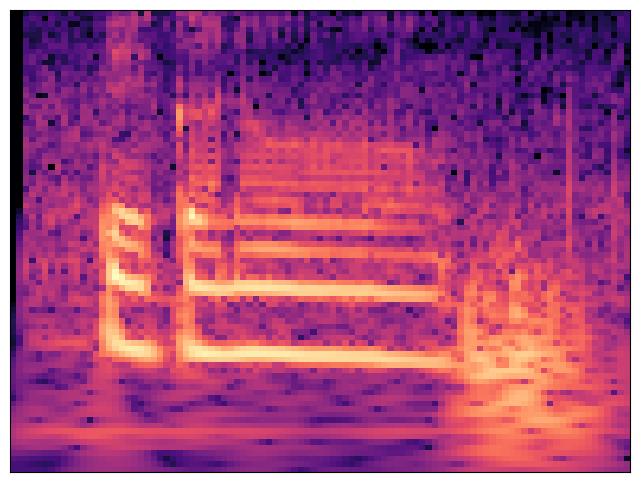

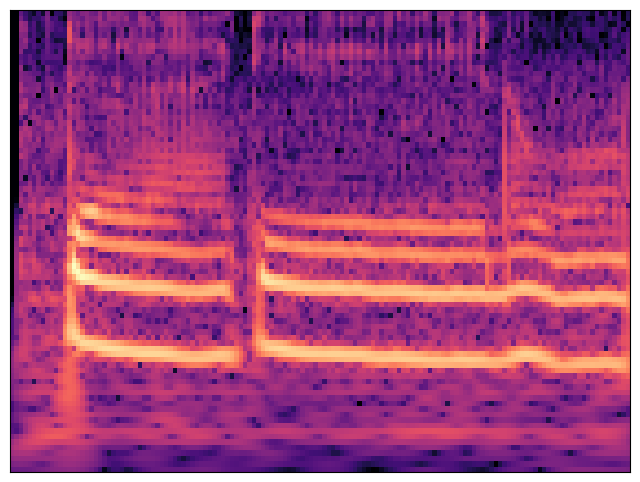

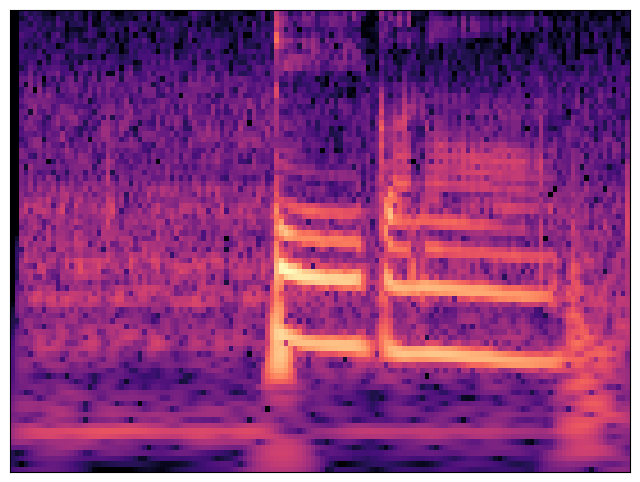

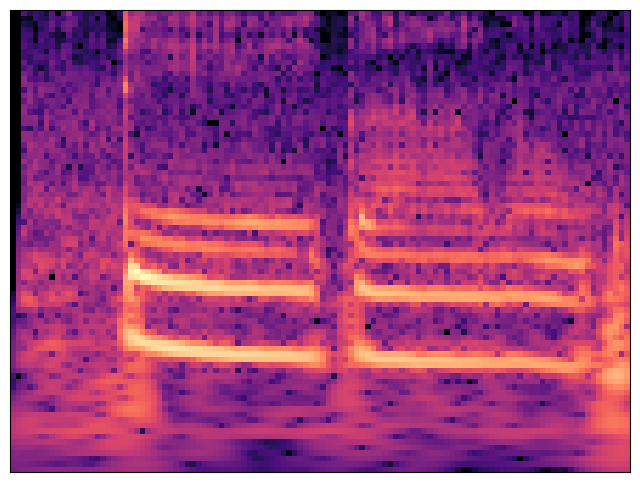

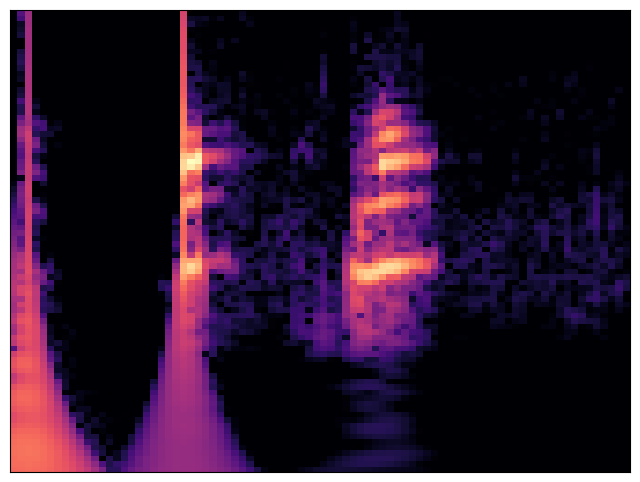

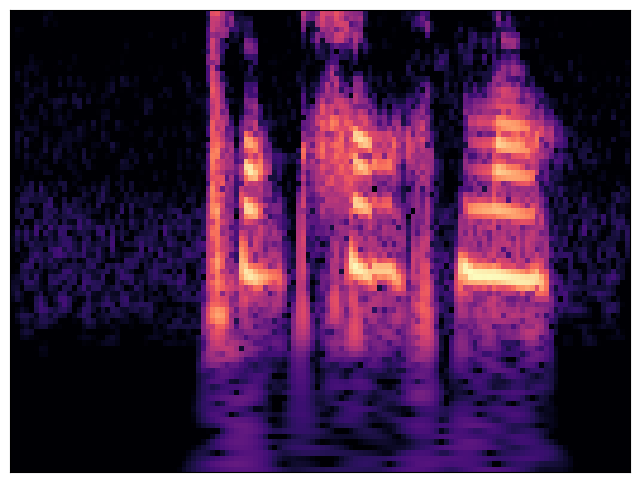

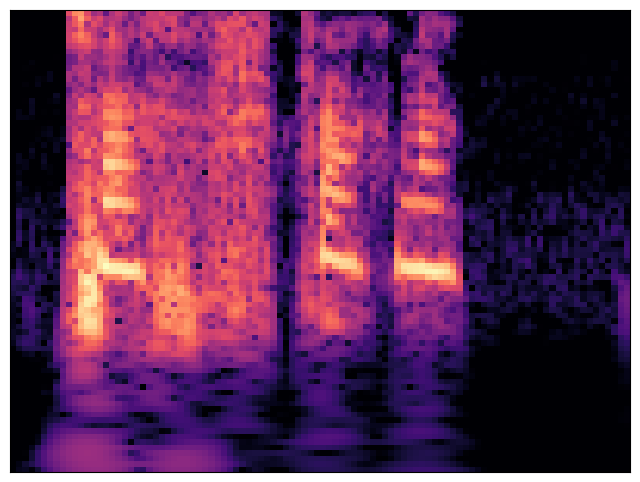

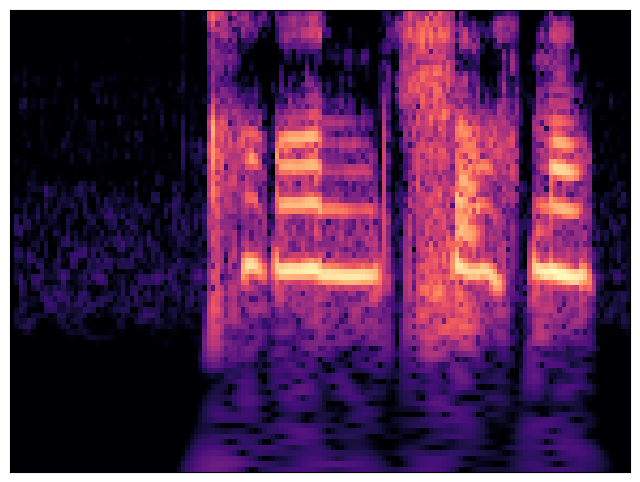

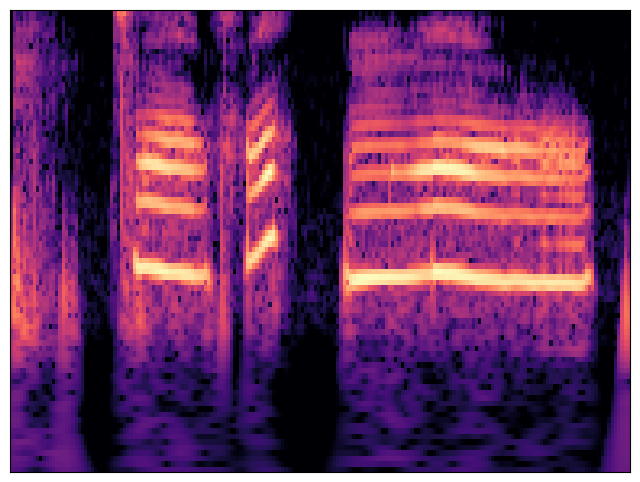

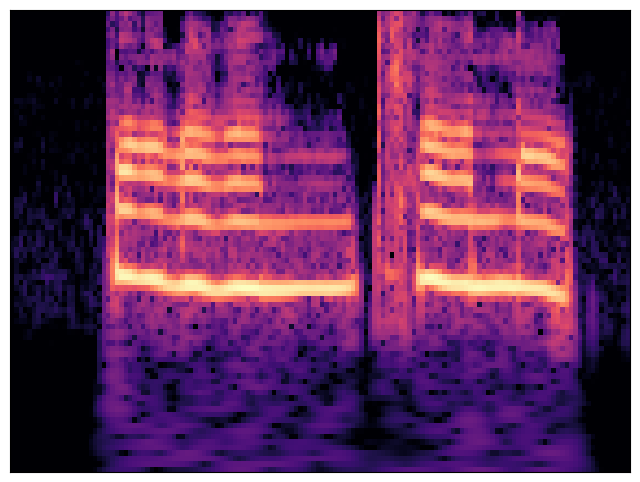

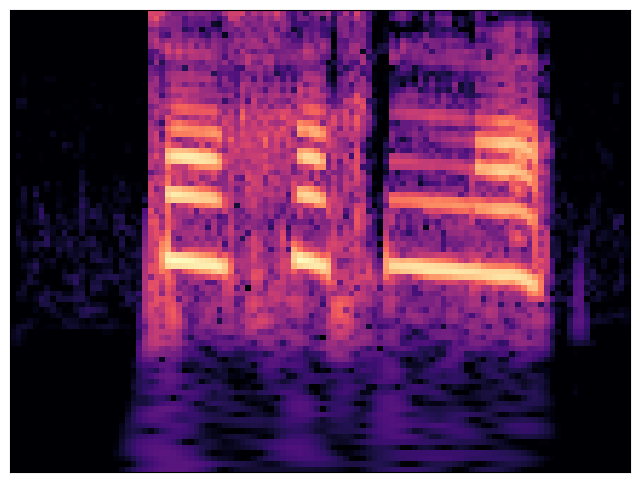

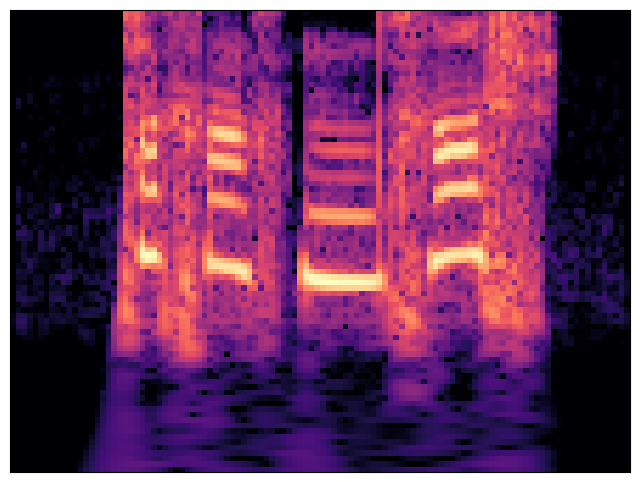

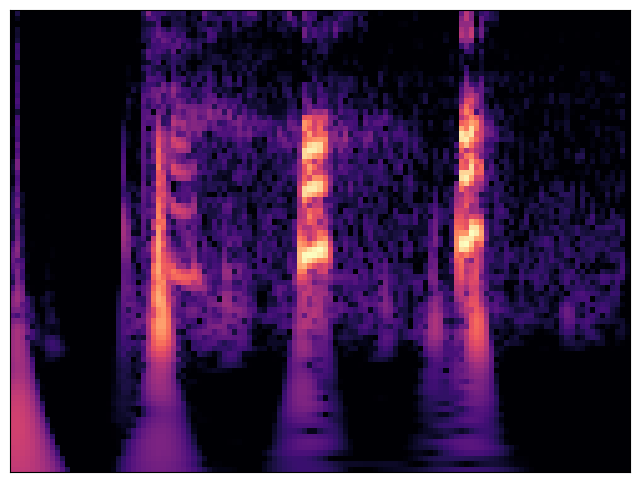

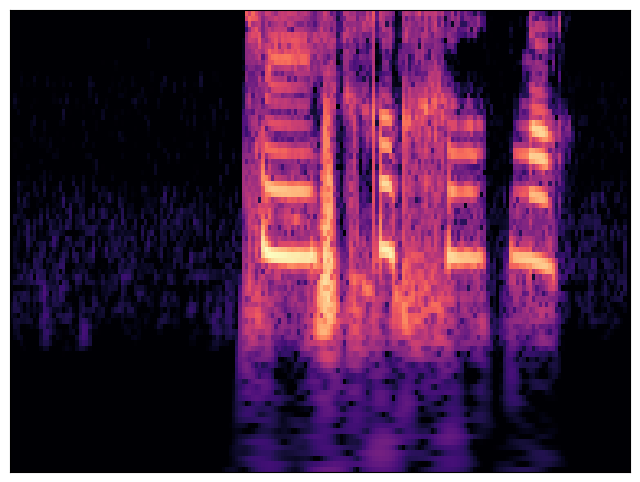

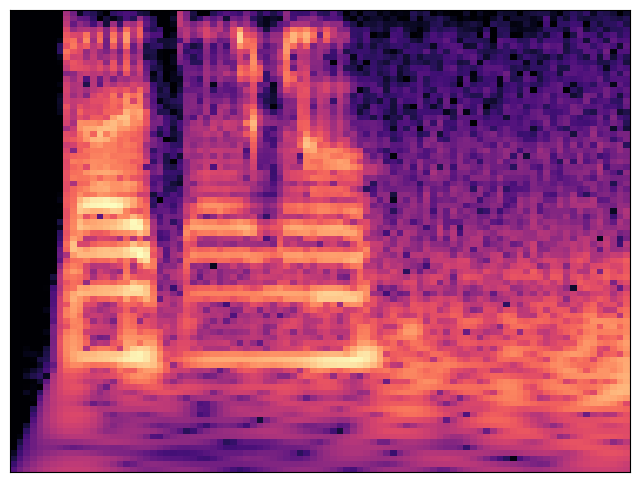

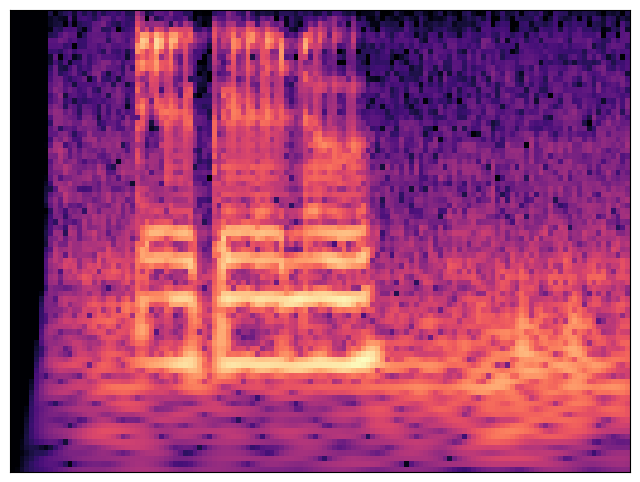

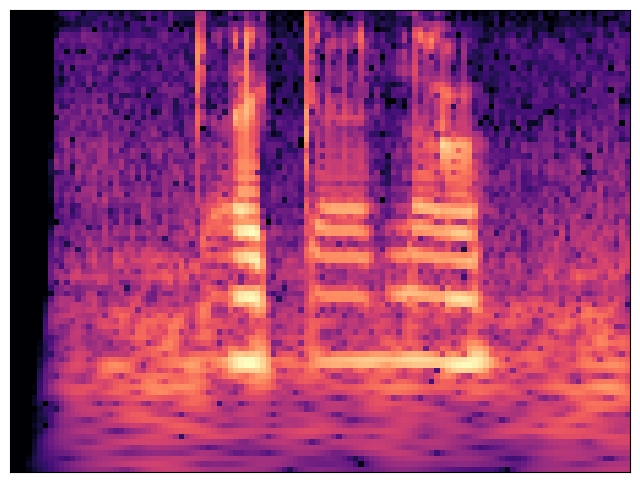

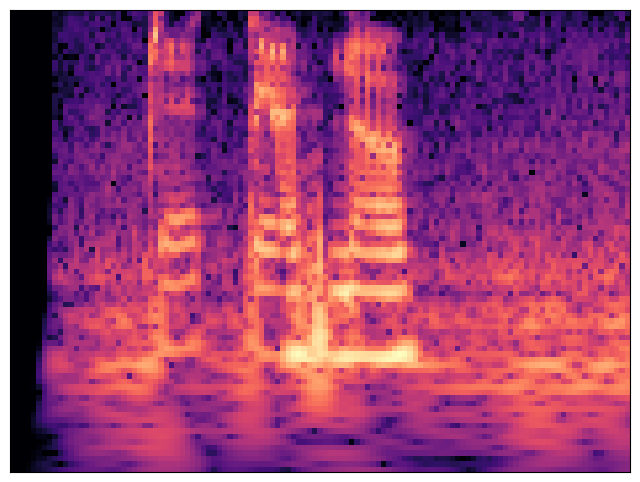

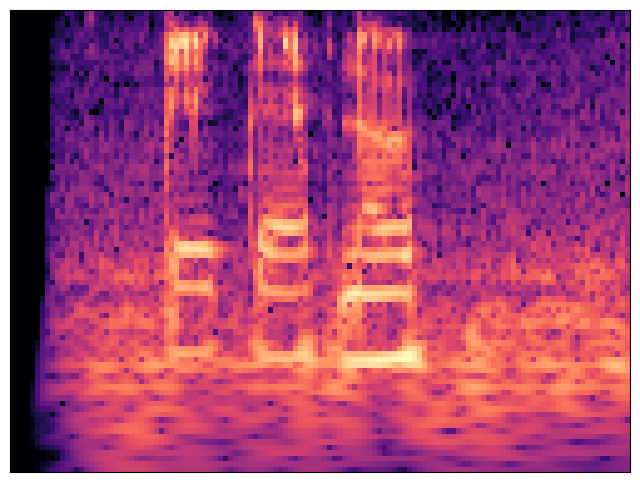

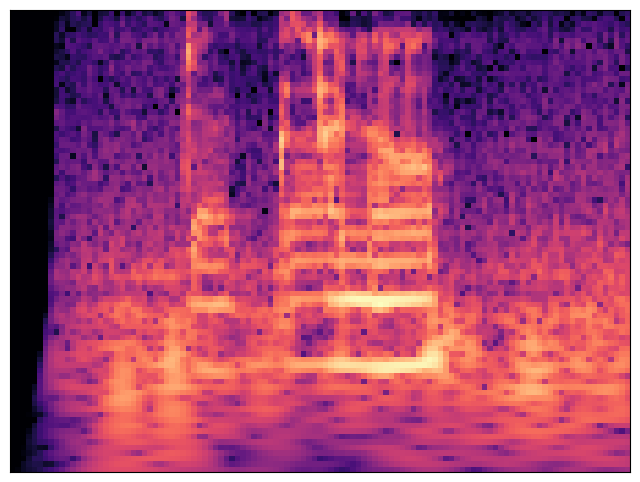

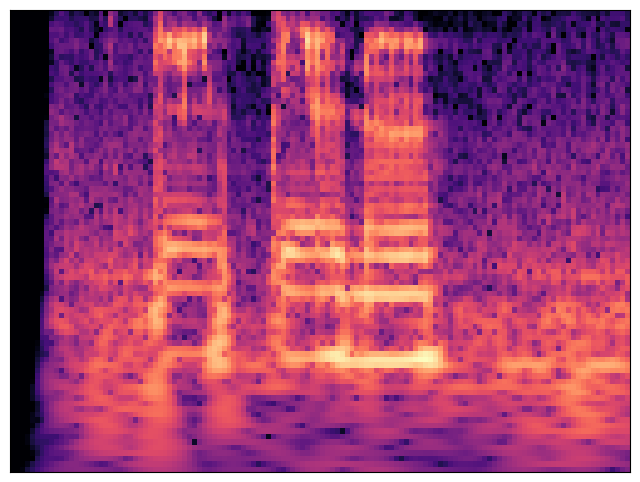

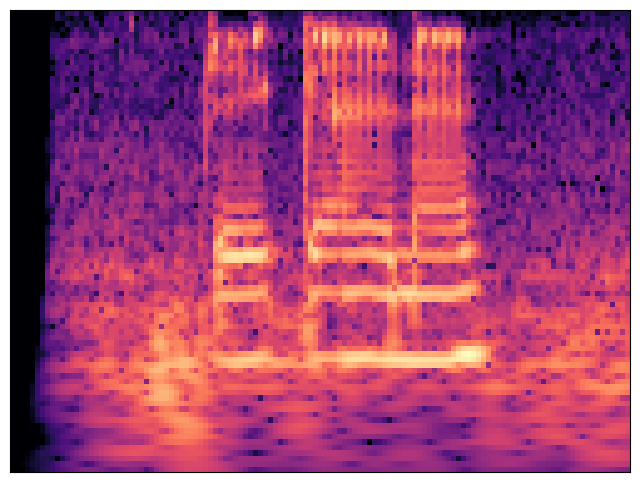

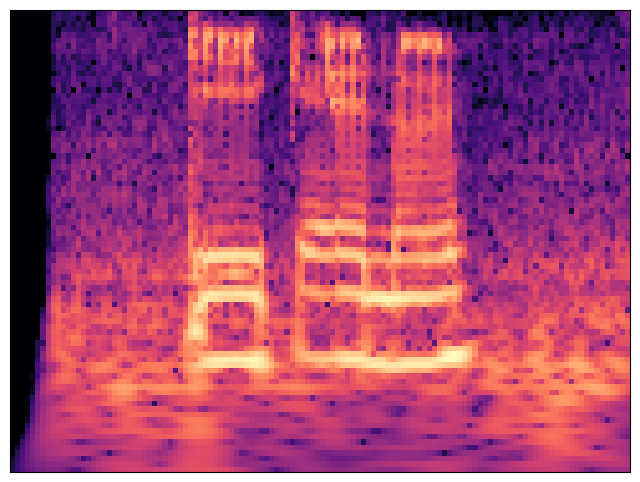

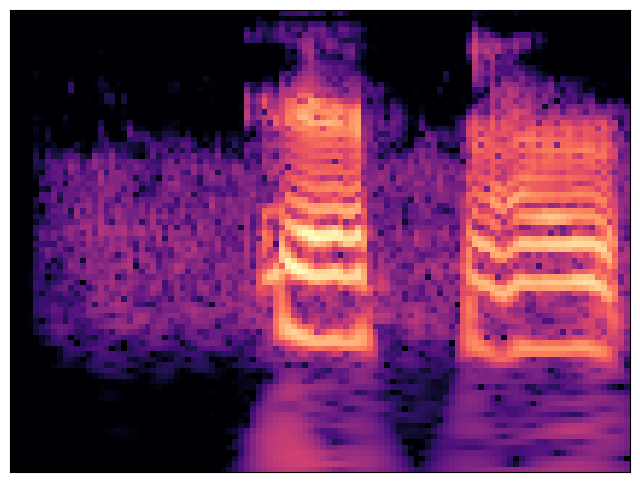

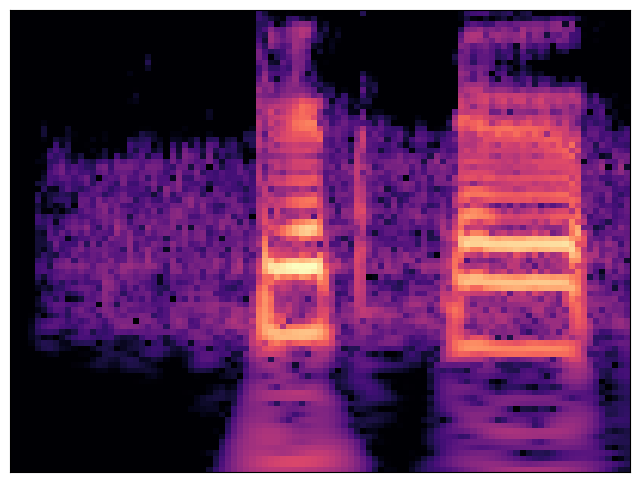

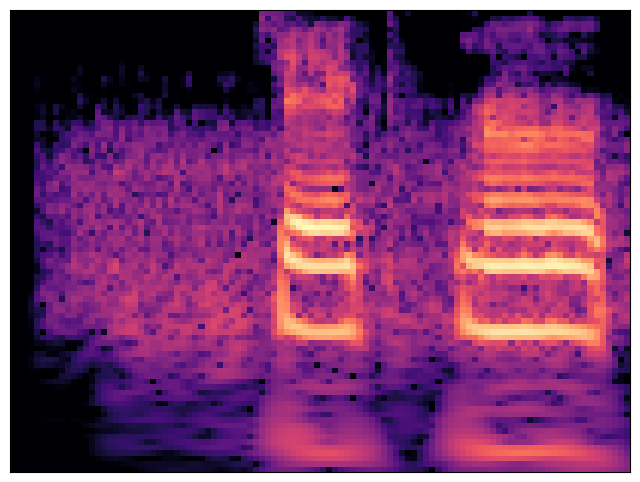

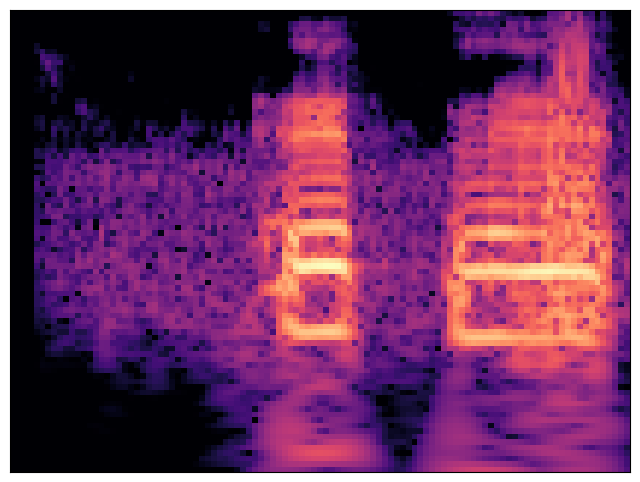

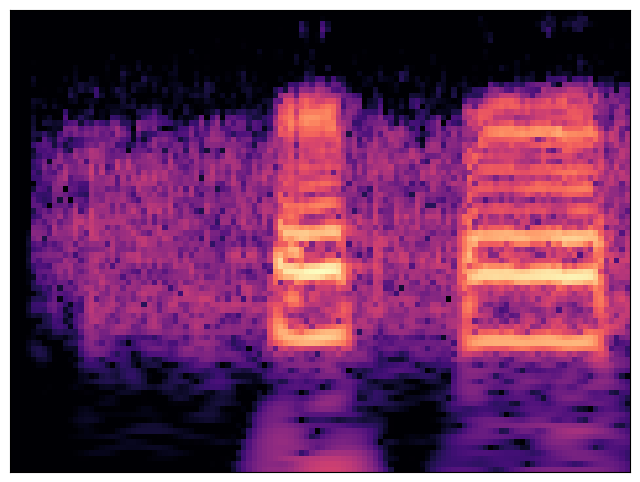

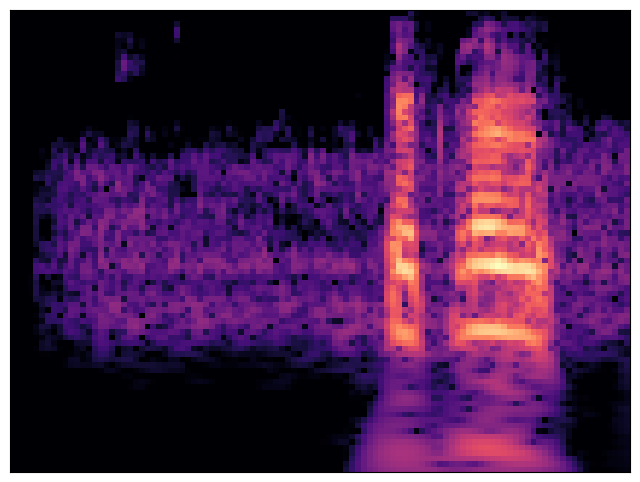

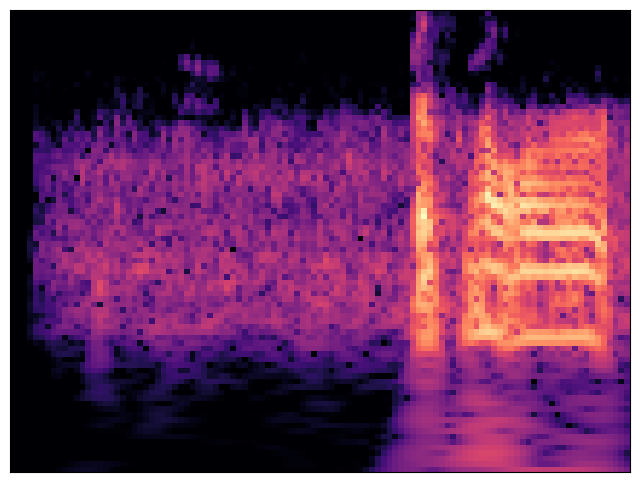

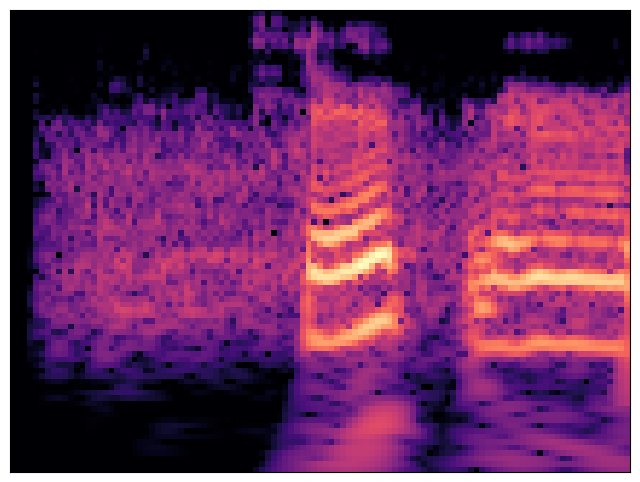

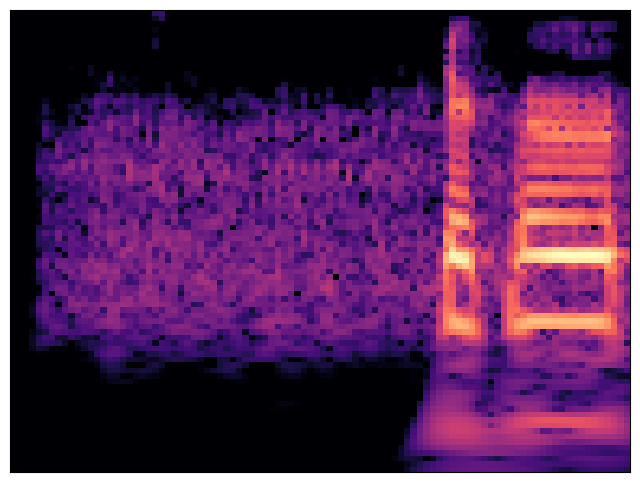

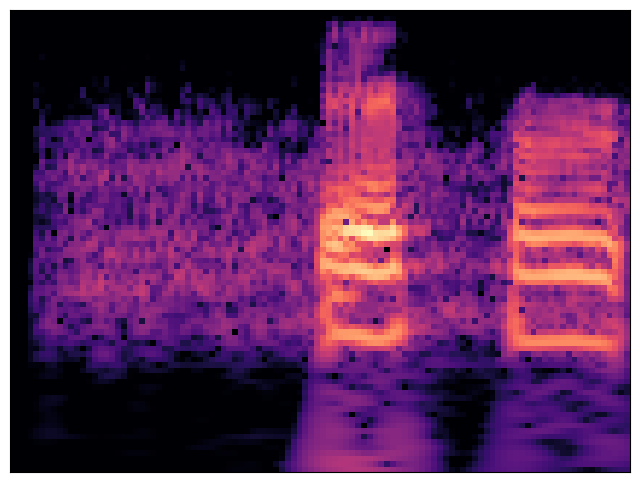

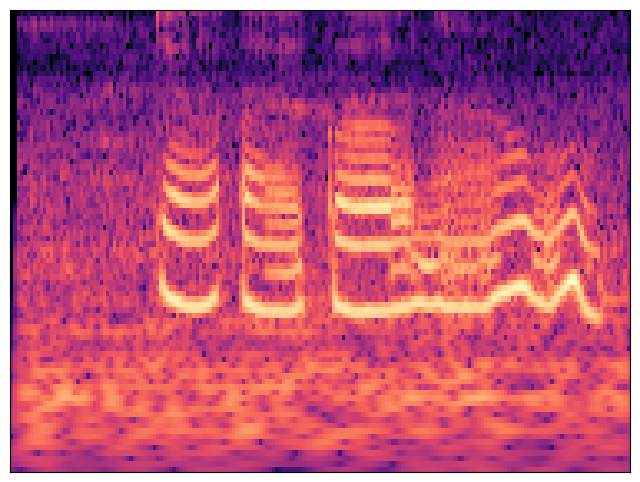

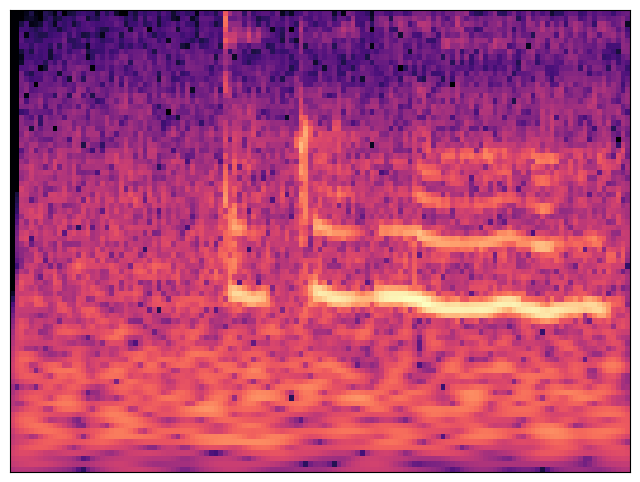

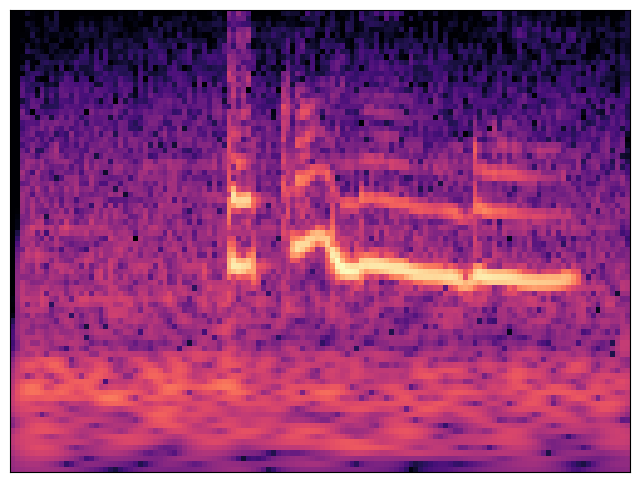

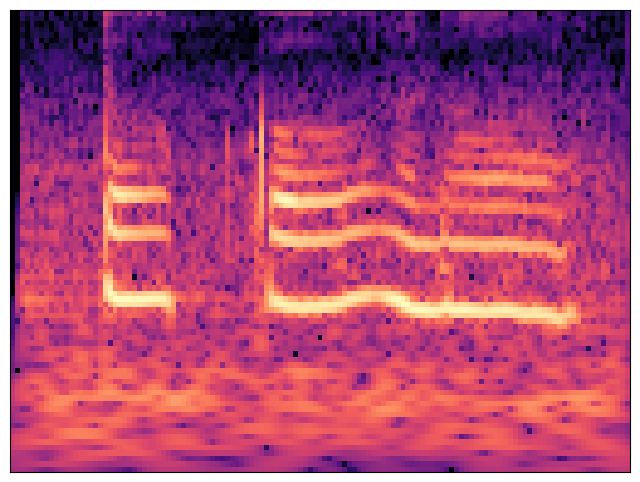

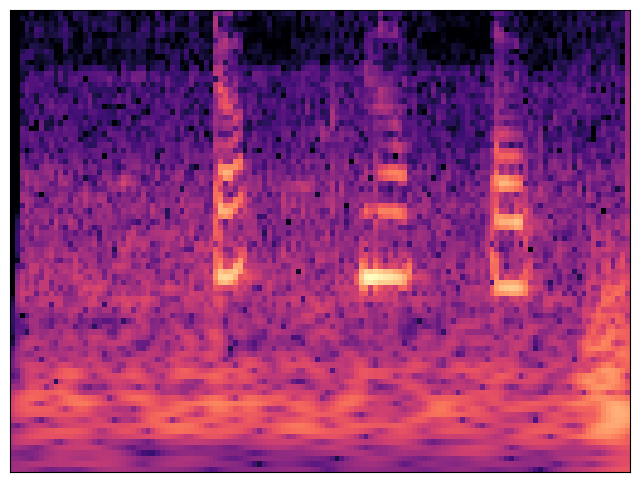

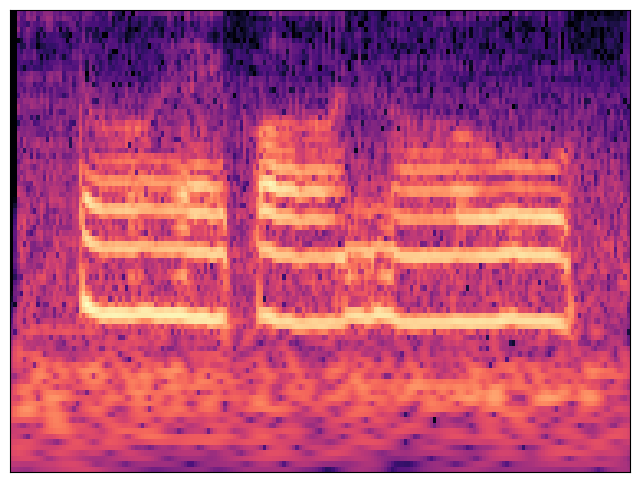

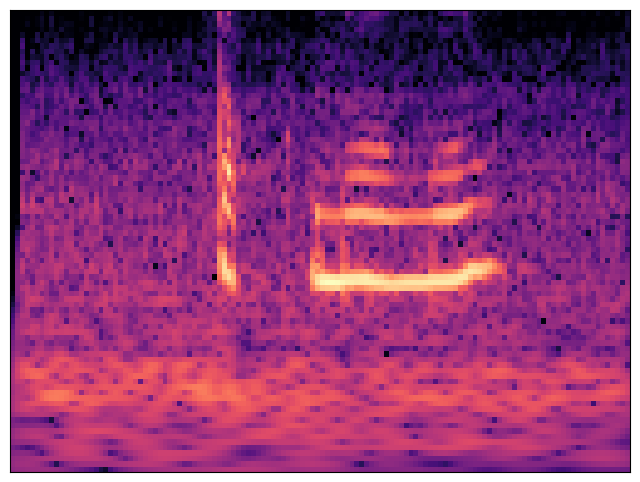

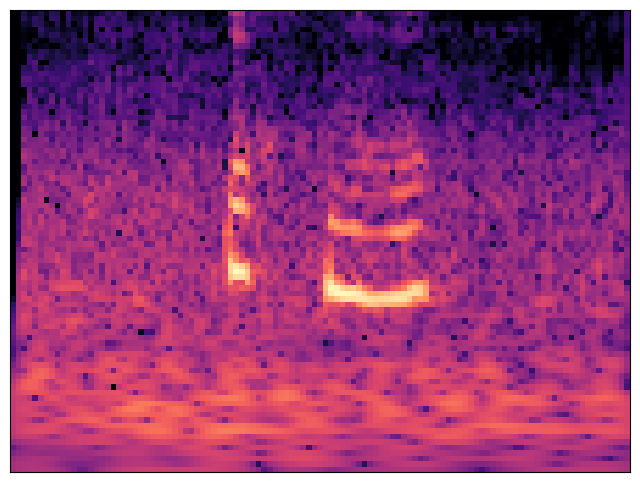

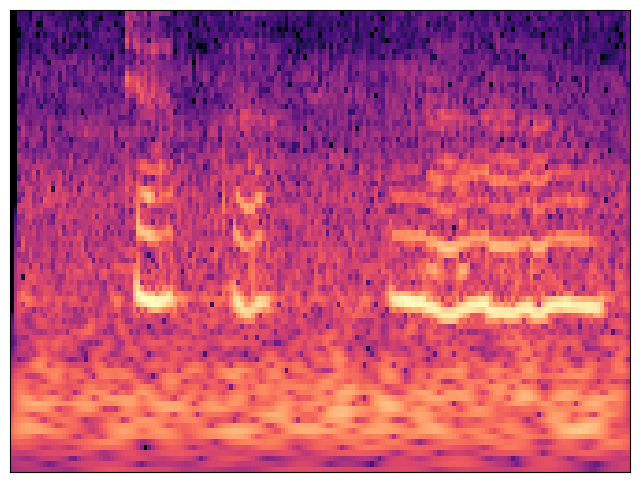

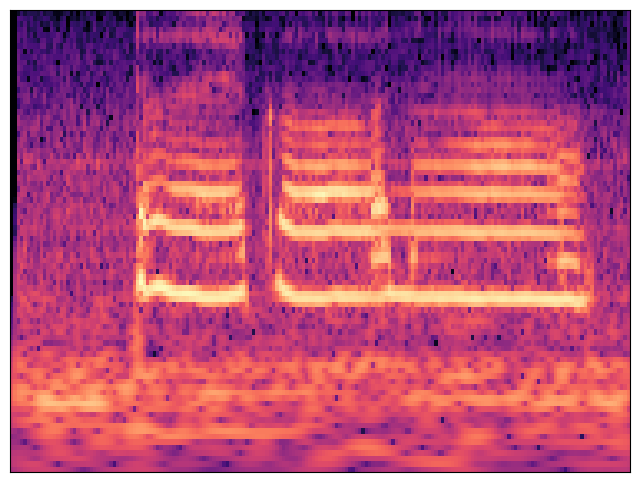

In [6]:
word_names = os.listdir(audio_folder_path)
word_names
for word in word_names:
  audio_path = audio_folder_path + word
  audio_names = os.listdir(audio_path)

  if not os.path.exists(saving_dir+word):
    os.mkdir(saving_dir+word)

  # print(audio_names)
  for audio in audio_names:
    print(audio)
    saving_location = saving_dir+word+'/'+audio.split('.')[0]
    CQT_spectrogram(audio_path+'/'+audio,saving_location)